In [11]:
!python --version

Python 3.7.3


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
import gc

In [4]:
os.chdir("D:\\RTM\\C7PHEV")

In [4]:
import sys
sys.executable

'C:\\Users\\faucn27\\AppData\\Local\\Continuum\\anaconda3\\python.exe'

In [5]:
print(os.getcwd())
print(sys.argv[0])
print(os.path.dirname(os.path.realpath('__file__')))

C:\Users\faucn27
C:\Users\faucn27\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py
C:\Users\faucn27


In [14]:
for root, dirs, files in os.walk("."):
    for name in files:
        print(name)

2017_dec.rds
2017_nov.rds
2017_oct.rds
2017_sept.rds
2018_apr.rds
2018_aug_battery_only.rds
2018_aug_without_battery.rds
2018_feb.rds
2018_jan.rds
2018_july_battery_only.rds
2018_july_without_battery.rds
2018_june_battery_only.rds
2018_june_without_battery.rds
2018_mar_battery_only.rds
2018_mar_without_battery.rds
2018_may_battery_only.rds
2018_may_without_battery.rds
2018_oct_battery_only_part1.rds
2018_oct_without_battery_part1.rds
2018_sept_battery_only.rds
2018_Sept_without_battery.rds


In [17]:
df=pyreadr.read_r('2017_dec.rds')
df=df[None]
df=df.drop('battery',axis=1)

In [25]:
df=pd.DataFrame()
for root, dirs, files in os.walk("."):
    for name in files:
        #if name.startswith('2017'):
        if len(name.split("_"))==2:
            t=pyreadr.read_r(name)
            t=t[None]
            t=t.drop('battery',axis=1)
            df=pd.concat([df,t],ignore_index=True, axis=0)
            del t
            gc.collect()
            
   #for name in dirs:
      #print(os.path.join(root, name))

d:\python 3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [27]:
import pickle
with open("201709_201802","wb") as pickle_out:
    pickle.dump(df,pickle_out,protocol=4)

In [2]:
import pickle
with open("201709_201802","rb") as pickle_in:
    df=pickle.load(pickle_in)

In [30]:
os.stat("201709_201802").st_size/1024/1024

1616.984624862671

In [26]:
df.shape

(4815466, 62)

In [ ]:
max(df['timestamp'])

In [32]:
import psutil
psutil.virtual_memory()
#psutil.swap_memory()
#psutil.disk_usage('/')

svmem(total=17091985408, available=8306339840, percent=51.4, used=8785645568, free=8306339840)

In [28]:
os.getcwd()

'D:\\Python 3\\jupyter\\RTM\\C7PHEV'

In [33]:
len(df.vin.unique())

998

In [7]:
pd.set_option('display.max_columns', None)  
df.head()

,ActTransmissionGearLeverPos,B2V_MaxCellTempCellNumber,B2V_MaxCellVoltage,B2V_MaxCellVoltageCellNumber,B2V_MinCellTempCellNumber,B2V_MinCellVoltage,B2V_MinCellVoltageCellNumber,BatteryHighTemperatureAlarm,BatteryMonomerConsistencyDifferenceAlarm,BrakeSystemAlarm,CrankshaftSpeed,DCTemperatureAlarm,DC_DCStatusAlarm,DC_DC_Sts,DeviceTypeOvercharge,DriveMotorControllerTemperatureAlarm,DriveMotorTemperatureAlarm,EMBusCurrentFlow,EMControlTmp,EMRotation,EMSerNum,EMTemp,EMTorque,EMVoltage,EMsts,EVehBatSOC,EVehTotalFlow,EVehTotalVol,GPSLatitude,GPSLongitude,HighVoltageInterlockStateAlarm,HighestLevelAlarm,InsulationAlarm,InsulationResistance,MaxTemp,MaxTempBatProbeCellNumber,MinTemp,MinTempBatProbeCellNumber,OvervoltageAlarm,SOCHighAlarm,SOCJumpAlarm,SOCLowAlarm,SerialNumOfMaxVoltate,SerialNumOfMinVoltate,SingleCellOvervoltageAlarm,SingleCellUndervoltageAlarm,TempContrastAlarm,TotalVehicleDistance,UndervoltageAlarm,VehBrakeSts,VehChargingSts,VehDriveSts,VehRunMode,VehicleSpeed,VehicleStatus,battery,engine_state,event,id,storageSystemMismatchAlarm,timestamp,uploadType,vin
0,P,1,3.984,65,1,3.973,17,0,0,0,1193.0,0,0,1,0,0,0,1.3,-6.0,1189.0,1,-9.0,0.0,414.0,4,1.00,15.0,414.5,43.838337,125.199108,0,0,0,10000.0,-7.0,8,-8.0,1,0,0,0,0,1,1,0,0,0,49966.0,0,1,3,0,2,0.0,1,10.2,1,upload,LFV0A24G0G3500029_1,0,2017-12-01 04:48:31,upload,LFV0A24G0G3500029
1,P,1,3.977,46,1,3.962,16,0,0,0,1187.0,0,0,1,0,0,0,1.0,-6.0,1186.0,1,-9.0,0.0,413.3,4,1.00,16.0,413.5,43.838371,125.19912,0,0,0,10000.0,-7.0,14,-9.0,2,0,0,0,0,1,1,0,0,0,49966.0,0,1,3,0,2,0.0,1,10.2,1,upload,LFV0A24G0G3500029_1,0,2017-12-01 04:48:41,upload,LFV0A24G0G3500029
2,P,1,3.973,48,1,3.956,16,0,0,0,1190.0,0,0,1,0,0,0,1.3,-6.0,1188.0,1,-8.0,0.0,413.0,4,1.00,14.0,413.0,43.838379,125.199126,0,0,0,7345.0,-7.0,14,-9.0,4,0,0,0,0,1,1,0,0,0,49966.0,0,0,3,0,2,0.0,1,10.2,1,upload,LFV0A24G0G3500029_1,0,2017-12-01 04:48:51,upload,LFV0A24G0G3500029
3,P,1,3.966,44,1,3.949,92,0,0,0,1191.0,0,0,1,0,0,0,1.8,-6.0,1190.0,1,-8.0,1.0,412.3,4,0.99,15.0,412.5,43.838374,125.199125,0,0,0,7345.0,-7.0,16,-9.0,10,0,0,0,0,1,1,0,0,0,49966.0,0,0,3,0,2,0.0,1,10.2,1,upload,LFV0A24G0G3500029_1,0,2017-12-01 04:49:01,upload,LFV0A24G0G3500029
4,P,1,3.964,40,1,3.957,22,0,0,0,1193.0,0,0,1,0,0,0,0.5,-6.0,1192.0,1,-8.0,0.0,411.8,4,0.99,15.0,412.3,43.838362,125.199123,0,0,0,7345.0,-7.0,4,-8.0,1,0,0,0,0,1,1,0,0,0,49966.0,0,1,3,0,2,0.0,1,10.2,1,upload,LFV0A24G0G3500029_1,0,2017-12-01 04:49:11,upload,LFV0A24G0G3500029


In [34]:
for i in df.columns:
    if "Alarm" in i:
        print((i,df[i].unique()))

('BatteryHighTemperatureAlarm', array(['0', '1'], dtype=object))
('BatteryMonomerConsistencyDifferenceAlarm', array(['0'], dtype=object))
('BrakeSystemAlarm', array(['0', '1'], dtype=object))
('DCTemperatureAlarm', array(['0'], dtype=object))
('DC_DCStatusAlarm', array(['0', '1'], dtype=object))
('DriveMotorControllerTemperatureAlarm', array(['0'], dtype=object))
('DriveMotorTemperatureAlarm', array(['0'], dtype=object))
('HighVoltageInterlockStateAlarm', array(['0', '1'], dtype=object))
('HighestLevelAlarm', array(['0', '3', '2', '1'], dtype=object))
('InsulationAlarm', array(['0'], dtype=object))
('OvervoltageAlarm', array(['0'], dtype=object))
('SOCHighAlarm', array(['0'], dtype=object))
('SOCJumpAlarm', array(['0', '1'], dtype=object))
('SOCLowAlarm', array(['0', '1'], dtype=object))
('SingleCellOvervoltageAlarm', array(['0'], dtype=object))
('SingleCellUndervoltageAlarm', array(['0'], dtype=object))
('TempContrastAlarm', array(['0', '1'], dtype=object))
('UndervoltageAlarm', array

In [35]:
df.groupby('HighestLevelAlarm').size()

HighestLevelAlarm
0    4807137
1       5743
2        697
3       1889
dtype: int64

In [4]:
print("\n".join(df.columns))

ActTransmissionGearLeverPos
B2V_MaxCellTempCellNumber
B2V_MaxCellVoltage
B2V_MaxCellVoltageCellNumber
B2V_MinCellTempCellNumber
B2V_MinCellVoltage
B2V_MinCellVoltageCellNumber
BatteryHighTemperatureAlarm
BatteryMonomerConsistencyDifferenceAlarm
BrakeSystemAlarm
CrankshaftSpeed
DCTemperatureAlarm
DC_DCStatusAlarm
DC_DC_Sts
DeviceTypeOvercharge
DriveMotorControllerTemperatureAlarm
DriveMotorTemperatureAlarm
EMBusCurrentFlow
EMControlTmp
EMRotation
EMSerNum
EMTemp
EMTorque
EMVoltage
EMsts
EVehBatSOC
EVehTotalFlow
EVehTotalVol
GPSLatitude
GPSLongitude
HighVoltageInterlockStateAlarm
HighestLevelAlarm
InsulationAlarm
InsulationResistance
MaxTemp
MaxTempBatProbeCellNumber
MinTemp
MinTempBatProbeCellNumber
OvervoltageAlarm
SOCHighAlarm
SOCJumpAlarm
SOCLowAlarm
SerialNumOfMaxVoltate
SerialNumOfMinVoltate
SingleCellOvervoltageAlarm
SingleCellUndervoltageAlarm
TempContrastAlarm
TotalVehicleDistance
UndervoltageAlarm
VehBrakeSts
VehChargingSts
VehDriveSts
VehRunMode
VehicleSpeed
VehicleStatus
batt

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304517 entries, 0 to 304516
Data columns (total 63 columns):
vin                                         304517 non-null object
timestamp                                   304517 non-null datetime64[ns]
battery                                     304517 non-null object
ActTransmissionGearLeverPos                 304517 non-null object
B2V_MaxCellTempCellNumber                   304517 non-null object
B2V_MaxCellVoltage                          304517 non-null float64
B2V_MaxCellVoltageCellNumber                304517 non-null object
B2V_MinCellTempCellNumber                   304517 non-null object
B2V_MinCellVoltage                          304517 non-null float64
B2V_MinCellVoltageCellNumber                304517 non-null object
BatteryHighTemperatureAlarm                 304517 non-null object
BatteryMonomerConsistencyDifferenceAlarm    304517 non-null object
BrakeSystemAlarm                            304517 non-null object
Cranksha

In [66]:
df['EMControlTmp'].dtype=='float64'

True

In [39]:
num_cols=[]
cat_cols=[]
for i in df.columns:
    if df[i].dtype=='float64':
        num_cols.append(i)
    else:
        cat_cols.append(i)

In [40]:
cat_cols

['ActTransmissionGearLeverPos',
 'B2V_MaxCellTempCellNumber',
 'B2V_MaxCellVoltageCellNumber',
 'B2V_MinCellTempCellNumber',
 'B2V_MinCellVoltageCellNumber',
 'BatteryHighTemperatureAlarm',
 'BatteryMonomerConsistencyDifferenceAlarm',
 'BrakeSystemAlarm',
 'DCTemperatureAlarm',
 'DC_DCStatusAlarm',
 'DC_DC_Sts',
 'DeviceTypeOvercharge',
 'DriveMotorControllerTemperatureAlarm',
 'DriveMotorTemperatureAlarm',
 'EMSerNum',
 'EMsts',
 'GPSLatitude',
 'GPSLongitude',
 'HighVoltageInterlockStateAlarm',
 'HighestLevelAlarm',
 'InsulationAlarm',
 'MaxTempBatProbeCellNumber',
 'MinTempBatProbeCellNumber',
 'OvervoltageAlarm',
 'SOCHighAlarm',
 'SOCJumpAlarm',
 'SOCLowAlarm',
 'SerialNumOfMaxVoltate',
 'SerialNumOfMinVoltate',
 'SingleCellOvervoltageAlarm',
 'SingleCellUndervoltageAlarm',
 'TempContrastAlarm',
 'UndervoltageAlarm',
 'VehBrakeSts',
 'VehChargingSts',
 'VehDriveSts',
 'VehRunMode',
 'VehicleStatus',
 'engine_state',
 'event',
 'id',
 'storageSystemMismatchAlarm',
 'timestamp',
 'u

In [41]:
id_cols=['vin',
 'B2V_MaxCellTempCellNumber',
 'B2V_MaxCellVoltageCellNumber',
 'B2V_MinCellTempCellNumber',
 'B2V_MinCellVoltageCellNumber',
 'GPSLatitude',
 'GPSLongitude',
 'MaxTempBatProbeCellNumber',
 'MinTempBatProbeCellNumber',
 'SerialNumOfMaxVoltate',
 'SerialNumOfMinVoltate',
 'EMSerNum',
 'id']
cat_cols=list(set(cat_cols)-set(id_cols))

In [42]:
sts_cols=[
'VehChargingSts',
 'VehicleStatus',
 'EMsts',
 'VehRunMode',
 'engine_state',
 'uploadType',
 'VehBrakeSts',
 'DC_DC_Sts',
 'DeviceTypeOvercharge',
 'VehDriveSts',
 'ActTransmissionGearLeverPos',
 'event'
]

alarm_cols=[
'TempContrastAlarm',
 'DCTemperatureAlarm',
     'SOCLowAlarm',
 'SingleCellUndervoltageAlarm',
    'HighestLevelAlarm',
 'SOCJumpAlarm',
 'UndervoltageAlarm',
    'InsulationAlarm',
 'SingleCellOvervoltageAlarm',
    'DriveMotorControllerTemperatureAlarm',
 'HighVoltageInterlockStateAlarm',
 'DC_DCStatusAlarm',
   'BrakeSystemAlarm',
 'SOCHighAlarm',
 'BatteryMonomerConsistencyDifferenceAlarm', 
     'storageSystemMismatchAlarm',
    'DriveMotorTemperatureAlarm',
    'OvervoltageAlarm',
    'BatteryHighTemperatureAlarm'  
]

cat_cols=list(set(cat_cols)-set(sts_cols)-set(alarm_cols))

In [43]:
cat_cols

['timestamp']

In [70]:

df[[
'TempContrastAlarm',
 'DCTemperatureAlarm',
     'SOCLowAlarm',
 'SingleCellUndervoltageAlarm',
 'UndervoltageAlarm',
    'InsulationAlarm',
 'SingleCellOvervoltageAlarm',
    'DriveMotorControllerTemperatureAlarm',
 'HighVoltageInterlockStateAlarm',
 'DC_DCStatusAlarm',
   'BrakeSystemAlarm',
 'SOCHighAlarm',
 'BatteryMonomerConsistencyDifferenceAlarm', 
     'storageSystemMismatchAlarm',
    'DriveMotorTemperatureAlarm',
    'OvervoltageAlarm',
    'BatteryHighTemperatureAlarm'  
]]=df[[
'TempContrastAlarm',
 'DCTemperatureAlarm',
     'SOCLowAlarm',
 'SingleCellUndervoltageAlarm',
 'UndervoltageAlarm',
    'InsulationAlarm',
 'SingleCellOvervoltageAlarm',
    'DriveMotorControllerTemperatureAlarm',
 'HighVoltageInterlockStateAlarm',
 'DC_DCStatusAlarm',
   'BrakeSystemAlarm',
 'SOCHighAlarm',
 'BatteryMonomerConsistencyDifferenceAlarm', 
     'storageSystemMismatchAlarm',
    'DriveMotorTemperatureAlarm',
    'OvervoltageAlarm',
    'BatteryHighTemperatureAlarm'  
]].apply(lambda x:x.astype('int'),axis=1)

df['highest']=df[[
'TempContrastAlarm',
 'DCTemperatureAlarm',
     'SOCLowAlarm',
 'SingleCellUndervoltageAlarm',
 'UndervoltageAlarm',
    'InsulationAlarm',
 'SingleCellOvervoltageAlarm',
    'DriveMotorControllerTemperatureAlarm',
 'HighVoltageInterlockStateAlarm',
 'DC_DCStatusAlarm',
   'BrakeSystemAlarm',
 'SOCHighAlarm',
 'BatteryMonomerConsistencyDifferenceAlarm', 
     'storageSystemMismatchAlarm',
    'DriveMotorTemperatureAlarm',
    'OvervoltageAlarm',
    'BatteryHighTemperatureAlarm'  
]].idxmax(axis=1)

In [71]:
df.head()

,ActTransmissionGearLeverPos,B2V_MaxCellTempCellNumber,B2V_MaxCellVoltage,B2V_MaxCellVoltageCellNumber,B2V_MinCellTempCellNumber,B2V_MinCellVoltage,B2V_MinCellVoltageCellNumber,BatteryHighTemperatureAlarm,BatteryMonomerConsistencyDifferenceAlarm,BrakeSystemAlarm,CrankshaftSpeed,DCTemperatureAlarm,DC_DCStatusAlarm,DC_DC_Sts,DeviceTypeOvercharge,DriveMotorControllerTemperatureAlarm,DriveMotorTemperatureAlarm,EMBusCurrentFlow,EMControlTmp,EMRotation,EMSerNum,EMTemp,EMTorque,EMVoltage,EMsts,EVehBatSOC,EVehTotalFlow,EVehTotalVol,GPSLatitude,GPSLongitude,HighVoltageInterlockStateAlarm,HighestLevelAlarm,InsulationAlarm,InsulationResistance,MaxTemp,MaxTempBatProbeCellNumber,MinTemp,MinTempBatProbeCellNumber,OvervoltageAlarm,SOCHighAlarm,SOCJumpAlarm,SOCLowAlarm,SerialNumOfMaxVoltate,SerialNumOfMinVoltate,SingleCellOvervoltageAlarm,SingleCellUndervoltageAlarm,TempContrastAlarm,TotalVehicleDistance,UndervoltageAlarm,VehBrakeSts,VehChargingSts,VehDriveSts,VehRunMode,VehicleSpeed,VehicleStatus,engine_state,event,id,storageSystemMismatchAlarm,timestamp,uploadType,vin,highest
0,P,1,3.984,65,1,3.973,17,0,0,0,1193.0,0,0,1,0,0,0,1.3,-6.0,1189.0,1,-9.0,0.0,414.0,4,1.00,15.0,414.5,43.838337,125.199108,0,0,0,10000.0,-7.0,8,-8.0,1,0,0,0,0,1,1,0,0,0,49966.0,0,1,3,0,2,0.0,1,1,upload,LFV0A24G0G3500029_1,0,2017-12-01 04:48:31,upload,LFV0A24G0G3500029,TempContrastAlarm
1,P,1,3.977,46,1,3.962,16,0,0,0,1187.0,0,0,1,0,0,0,1.0,-6.0,1186.0,1,-9.0,0.0,413.3,4,1.00,16.0,413.5,43.838371,125.19912,0,0,0,10000.0,-7.0,14,-9.0,2,0,0,0,0,1,1,0,0,0,49966.0,0,1,3,0,2,0.0,1,1,upload,LFV0A24G0G3500029_1,0,2017-12-01 04:48:41,upload,LFV0A24G0G3500029,TempContrastAlarm
2,P,1,3.973,48,1,3.956,16,0,0,0,1190.0,0,0,1,0,0,0,1.3,-6.0,1188.0,1,-8.0,0.0,413.0,4,1.00,14.0,413.0,43.838379,125.199126,0,0,0,7345.0,-7.0,14,-9.0,4,0,0,0,0,1,1,0,0,0,49966.0,0,0,3,0,2,0.0,1,1,upload,LFV0A24G0G3500029_1,0,2017-12-01 04:48:51,upload,LFV0A24G0G3500029,TempContrastAlarm
3,P,1,3.966,44,1,3.949,92,0,0,0,1191.0,0,0,1,0,0,0,1.8,-6.0,1190.0,1,-8.0,1.0,412.3,4,0.99,15.0,412.5,43.838374,125.199125,0,0,0,7345.0,-7.0,16,-9.0,10,0,0,0,0,1,1,0,0,0,49966.0,0,0,3,0,2,0.0,1,1,upload,LFV0A24G0G3500029_1,0,2017-12-01 04:49:01,upload,LFV0A24G0G3500029,TempContrastAlarm
4,P,1,3.964,40,1,3.957,22,0,0,0,1193.0,0,0,1,0,0,0,0.5,-6.0,1192.0,1,-8.0,0.0,411.8,4,0.99,15.0,412.3,43.838362,125.199123,0,0,0,7345.0,-7.0,4,-8.0,1,0,0,0,0,1,1,0,0,0,49966.0,0,1,3,0,2,0.0,1,1,upload,LFV0A24G0G3500029_1,0,2017-12-01 04:49:11,upload,LFV0A24G0G3500029,TempContrastAlarm


In [73]:
test=df[(df['vin']=='LFV0A24G0G3500029')&(df['id']=='LFV0A24G0G3500029_2')]

test['time']=test['timestamp'].diff(1)
test['time']=test['time'].apply(lambda x:x.total_seconds())

d:\python 3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\python 3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [74]:
import matplotlib.pyplot as plt
test['time'].value_counts()

10.0    332
38.0      1
Name: time, dtype: int64

In [9]:
df.groupby(['vin','id']).agg({'timestamp':[np.min,np.max]})

timestamp  \
                                                       amin   
vin               id                                          
LFV0A24G0G3500029 LFV0A24G0G3500029_1   2017-09-21 05:58:53   
                  LFV0A24G0G3500029_10  2017-09-26 06:01:26   
                  LFV0A24G0G3500029_100 2017-10-24 22:50:14   
                  LFV0A24G0G3500029_101 2017-10-25 00:19:28   
                  LFV0A24G0G3500029_102 2017-10-25 01:39:01   
                  LFV0A24G0G3500029_103 2017-10-25 05:49:08   
                  LFV0A24G0G3500029_104 2017-10-25 09:32:51   
                  LFV0A24G0G3500029_105 2017-10-26 00:48:59   
                  LFV0A24G0G3500029_106 2017-10-26 04:00:28   
                  LFV0A24G0G3500029_107 2017-10-26 04:11:00   
                  LFV0A24G0G3500029_108 2017-10-26 04:17:12   
                  LFV0A24G0G3500029_109 2017-10-26 04:36:11   
                  LFV0A24G0G3500029_11  2017-09-26 06:01:46   
                  LFV0A24G0G3500029_110 2017-10-26 05:20:48   
                  LFV0A24G0G3500029_111 2017-10-26 05:21:23   
                  LFV0A24G0G3500029_112 2017-10-26 06:59:29   
                  LFV0A24G0G3500029_113 2017-10-26 07:32:48   
                  LFV0A24G0G3500029_114 2017-10-26 20:34:45   
                  LFV0A24G0G3500029_115 2017-10-26 22:41:52   
                  LFV0A24G0G3500029_116 2017-10-26 23:10:45   
                  LFV0A24G0G3500029_117 2017-10-27 00:22:21   
                  LFV0A24G0G3500029_118 2017-10-27 01:48:00   
                  LFV0A24G0G3500029_119 2017-10-27 05:59:04   
                  LFV0A24G0G3500029_12  2017-09-26 06:30:12   
                  LFV0A24G0G3500029_120 2017-10-27 09:47:37   
                  LFV0A24G0G3500029_121 2017-10-27 20:32:13   
                  LFV0A24G0G3500029_122 2017-10-27 21:01:00   
                  LFV0A24G0G3500029_123 2017-10-27 21:24:53   
                  LFV0A24G0G3500029_124 2017-10-28 00:06:01   
                  LFV0A24G0G3500029_125 2017-10-28 08:55:45   
...                                                     ...   
LSVCE73EXH2013639 LSVCE73EXH2013639_15  2017-10-20 05:45:59   
                  LSVCE73EXH2013639_16  2017-10-23 02:17:08   
                  LSVCE73EXH2013639_17  2017-10-23 03:00:09   
                  LSVCE73EXH2013639_18  2017-10-23 04:03:59   
                  LSVCE73EXH2013639_19  2017-10-23 06:26:46   
                  LSVCE73EXH2013639_2   2017-10-16 00:02:41   
                  LSVCE73EXH2013639_20  2017-10-23 06:40:10   
                  LSVCE73EXH2013639_21  2017-10-25 02:49:38   
                  LSVCE73EXH2013639_22  2017-10-25 03:36:15   
                  LSVCE73EXH2013639_23  2017-10-25 04:31:50   
                  LSVCE73EXH2013639_24  2017-10-25 04:57:02   
                  LSVCE73EXH2013639_25  2017-10-27 04:34:22   
                  LSVCE73EXH2013639_26  2017-10-27 04:53:46   
                  LSVCE73EXH2013639_27  2017-10-27 06:04:52   
                  LSVCE73EXH2013639_28  2017-10-27 09:19:51   
                  LSVCE73EXH2013639_29  2017-10-27 09:26:45   
                  LSVCE73EXH2013639_3   2017-10-16 03:49:44   
                  LSVCE73EXH2013639_30  2017-10-30 04:41:11   
                  LSVCE73EXH2013639_31  2017-10-30 04:55:41   
                  LSVCE73EXH2013639_32  2017-10-31 04:36:34   
                  LSVCE73EXH2013639_33  2017-10-31 05:01:39   
                  LSVCE73EXH2013639_4   2017-10-16 07:45:32   
                  LSVCE73EXH2013639_5   2017-10-18 02:30:53   
                  LSVCE73EXH2013639_6   2017-10-18 03:39:55   
                  LSVCE73EXH2013639_7   2017-10-18 04:12:09   
                  LSVCE73EXH2013639_8   2017-10-18 04:24:47   
                  LSVCE73EXH2013639_9   2017-10-18 04:31:43   
TEST5VIN500230001 TEST5VIN500230001_1   2017-09-28 11:28:19   
                  TEST5VIN500230001_2   2017-11-13 10:01:34   
                  TEST5VIN500230001_3   2017-11-14 01:36:08   

                 

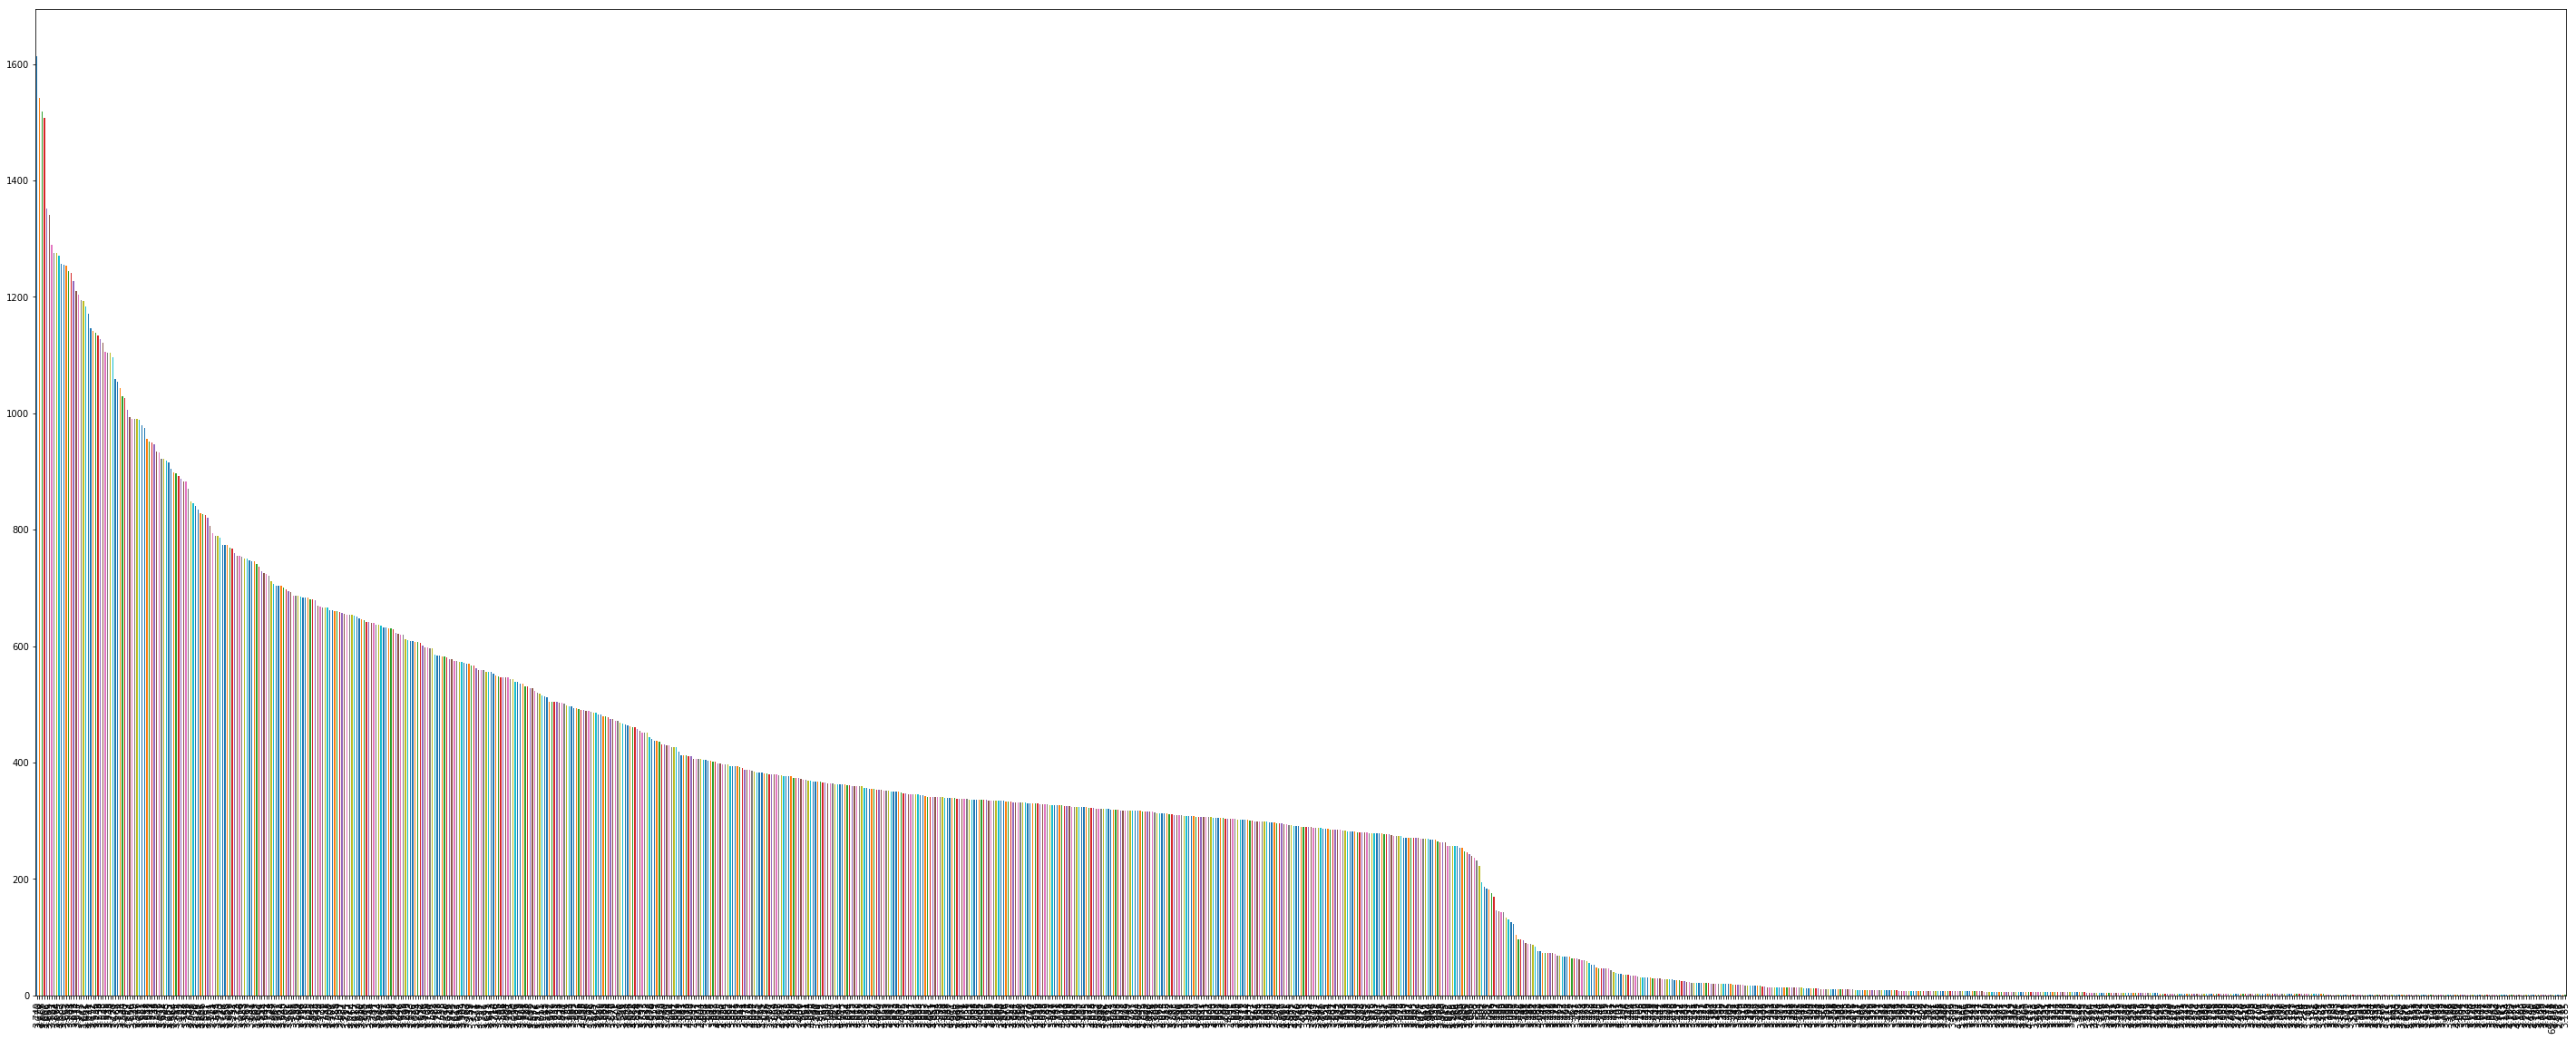

In [80]:
plt.figure(figsize=(50,20))
df.B2V_MaxCellVoltage.value_counts().plot(kind='bar')

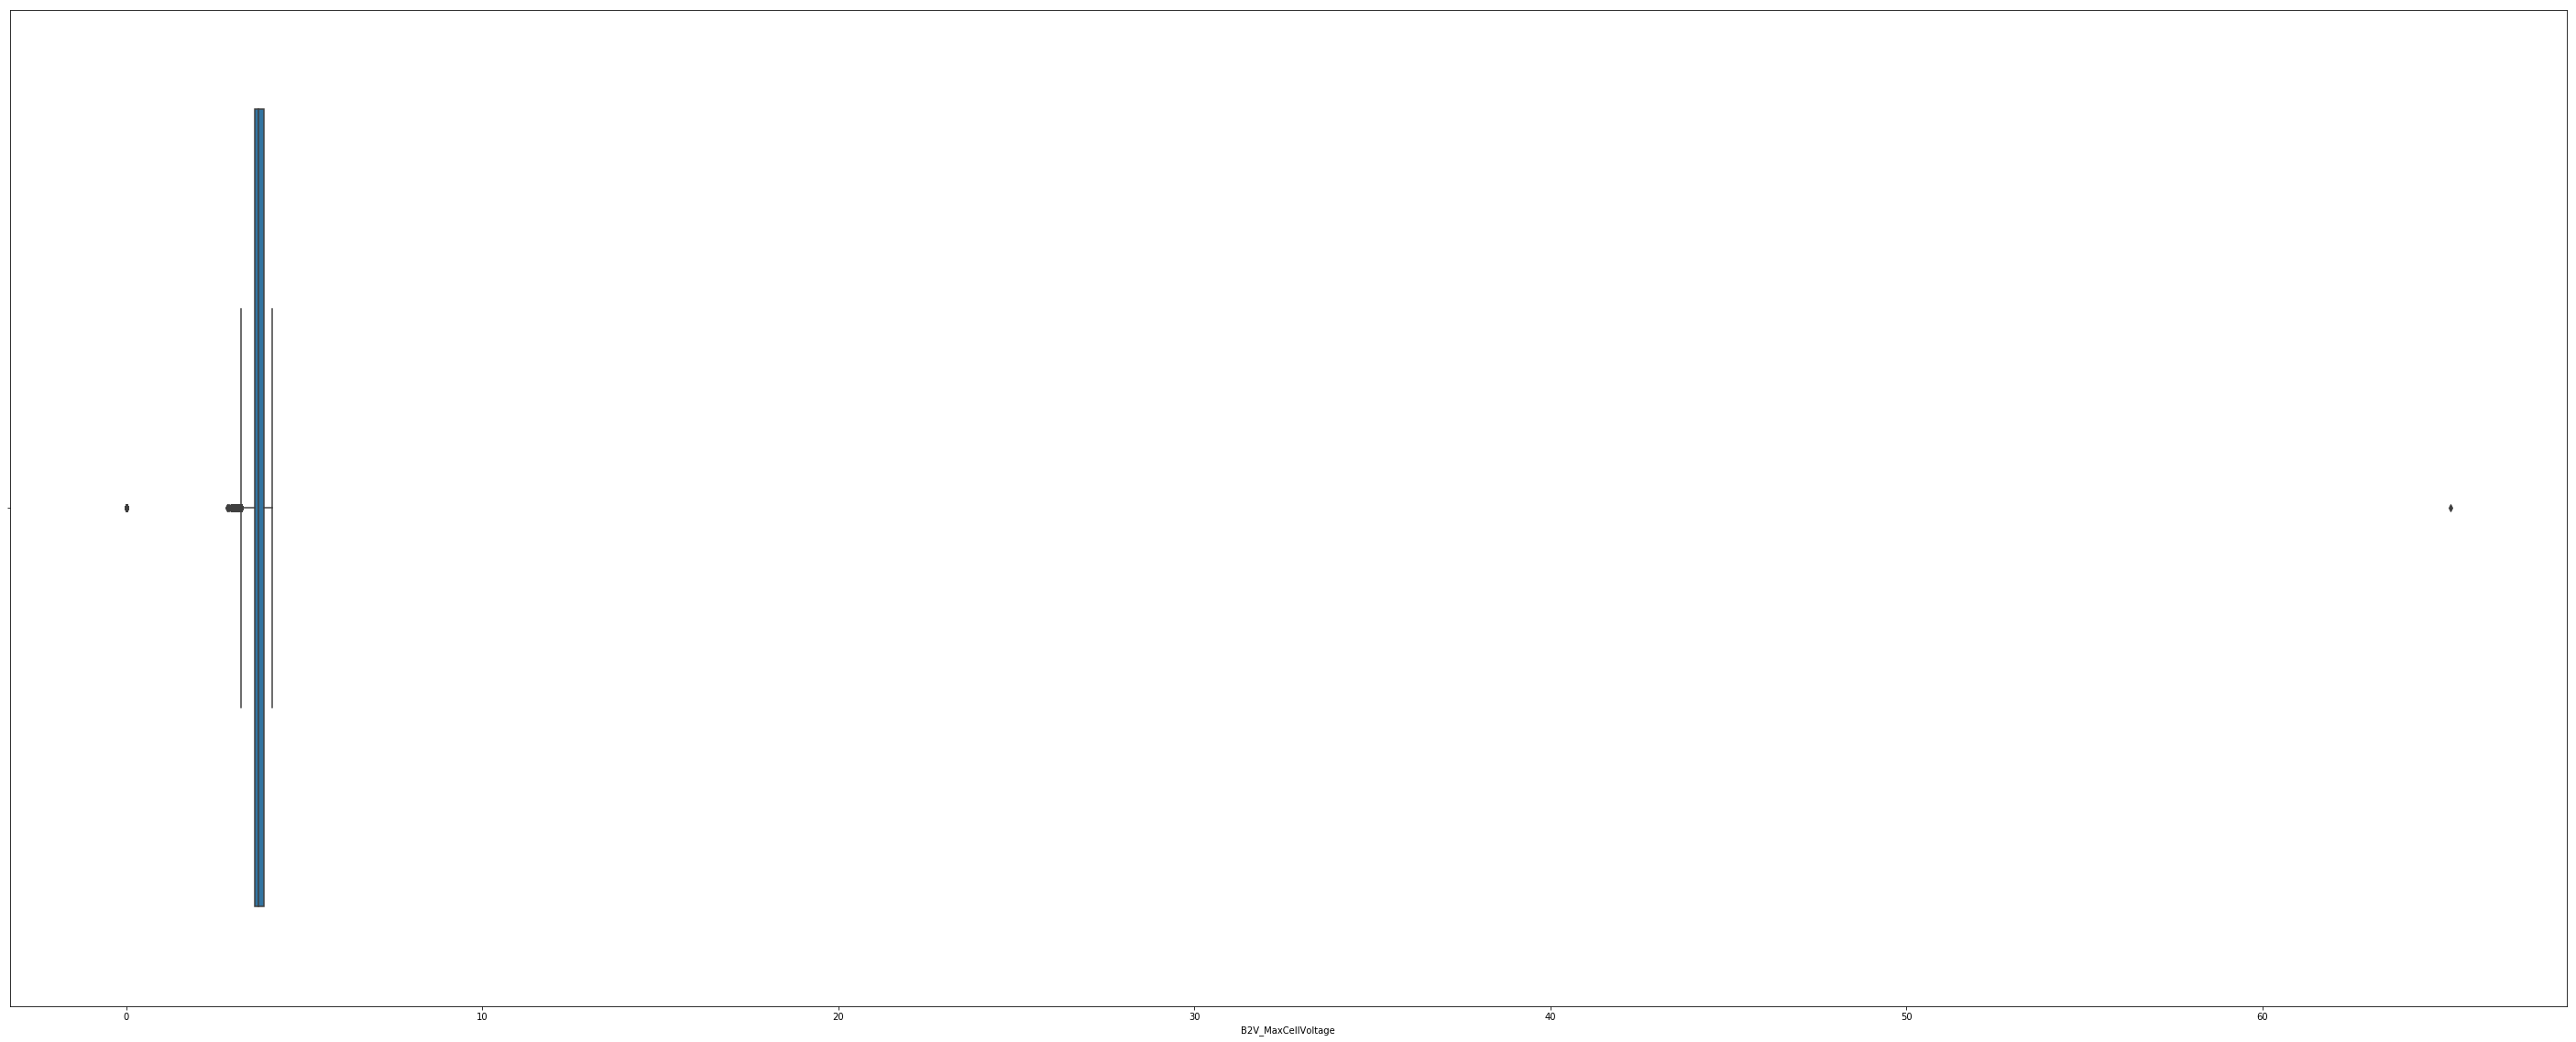

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(50,20))
import seaborn as sns
sns.boxplot(df.B2V_MaxCellVoltage)

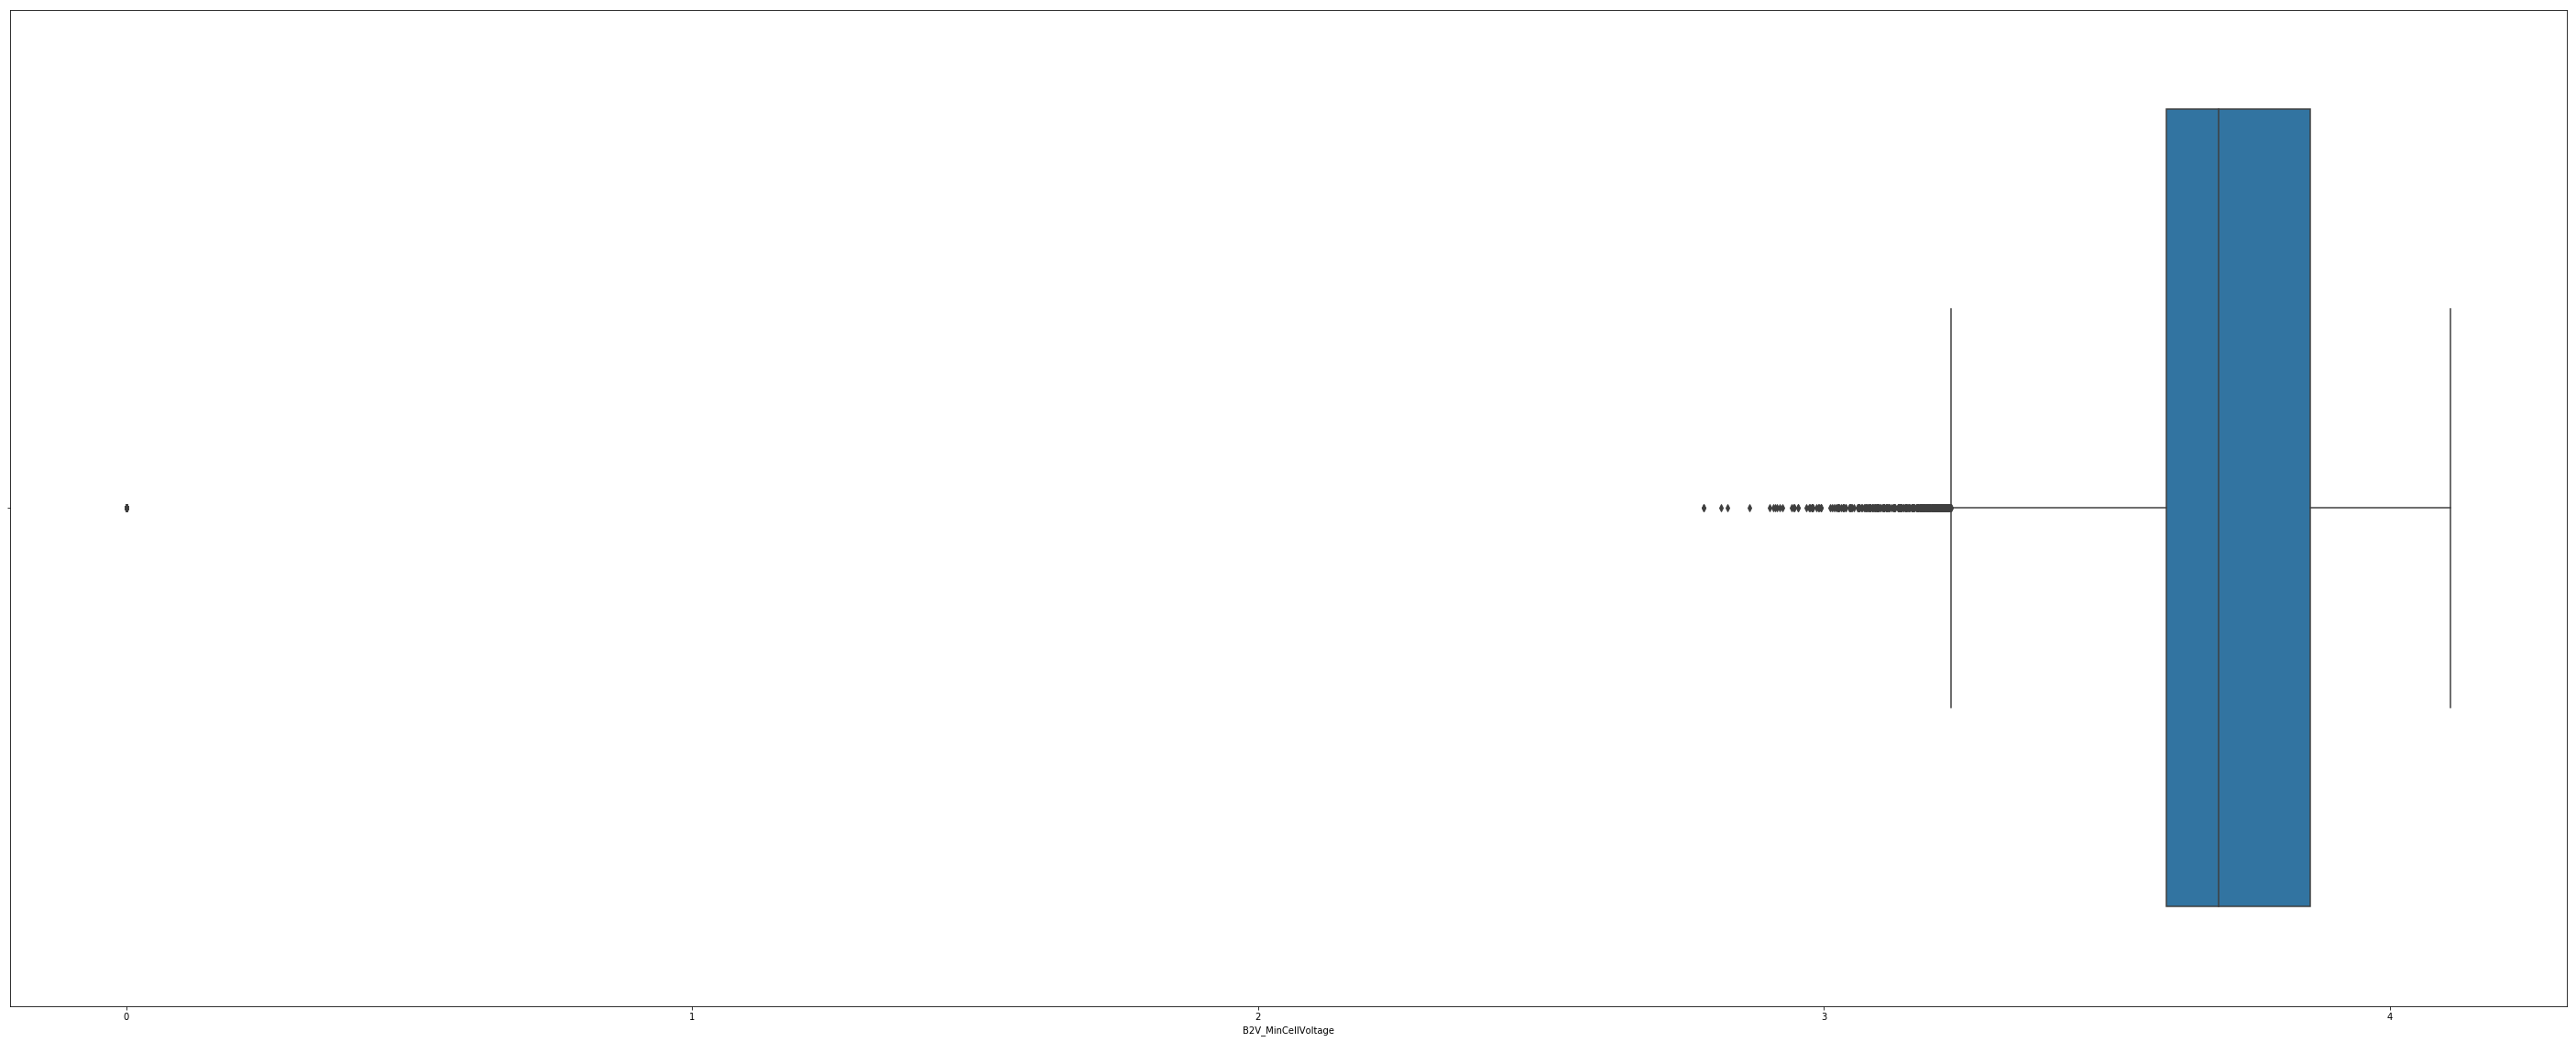

In [92]:
plt.figure(figsize=(50,20))
sns.boxplot(df.B2V_MinCellVoltage)

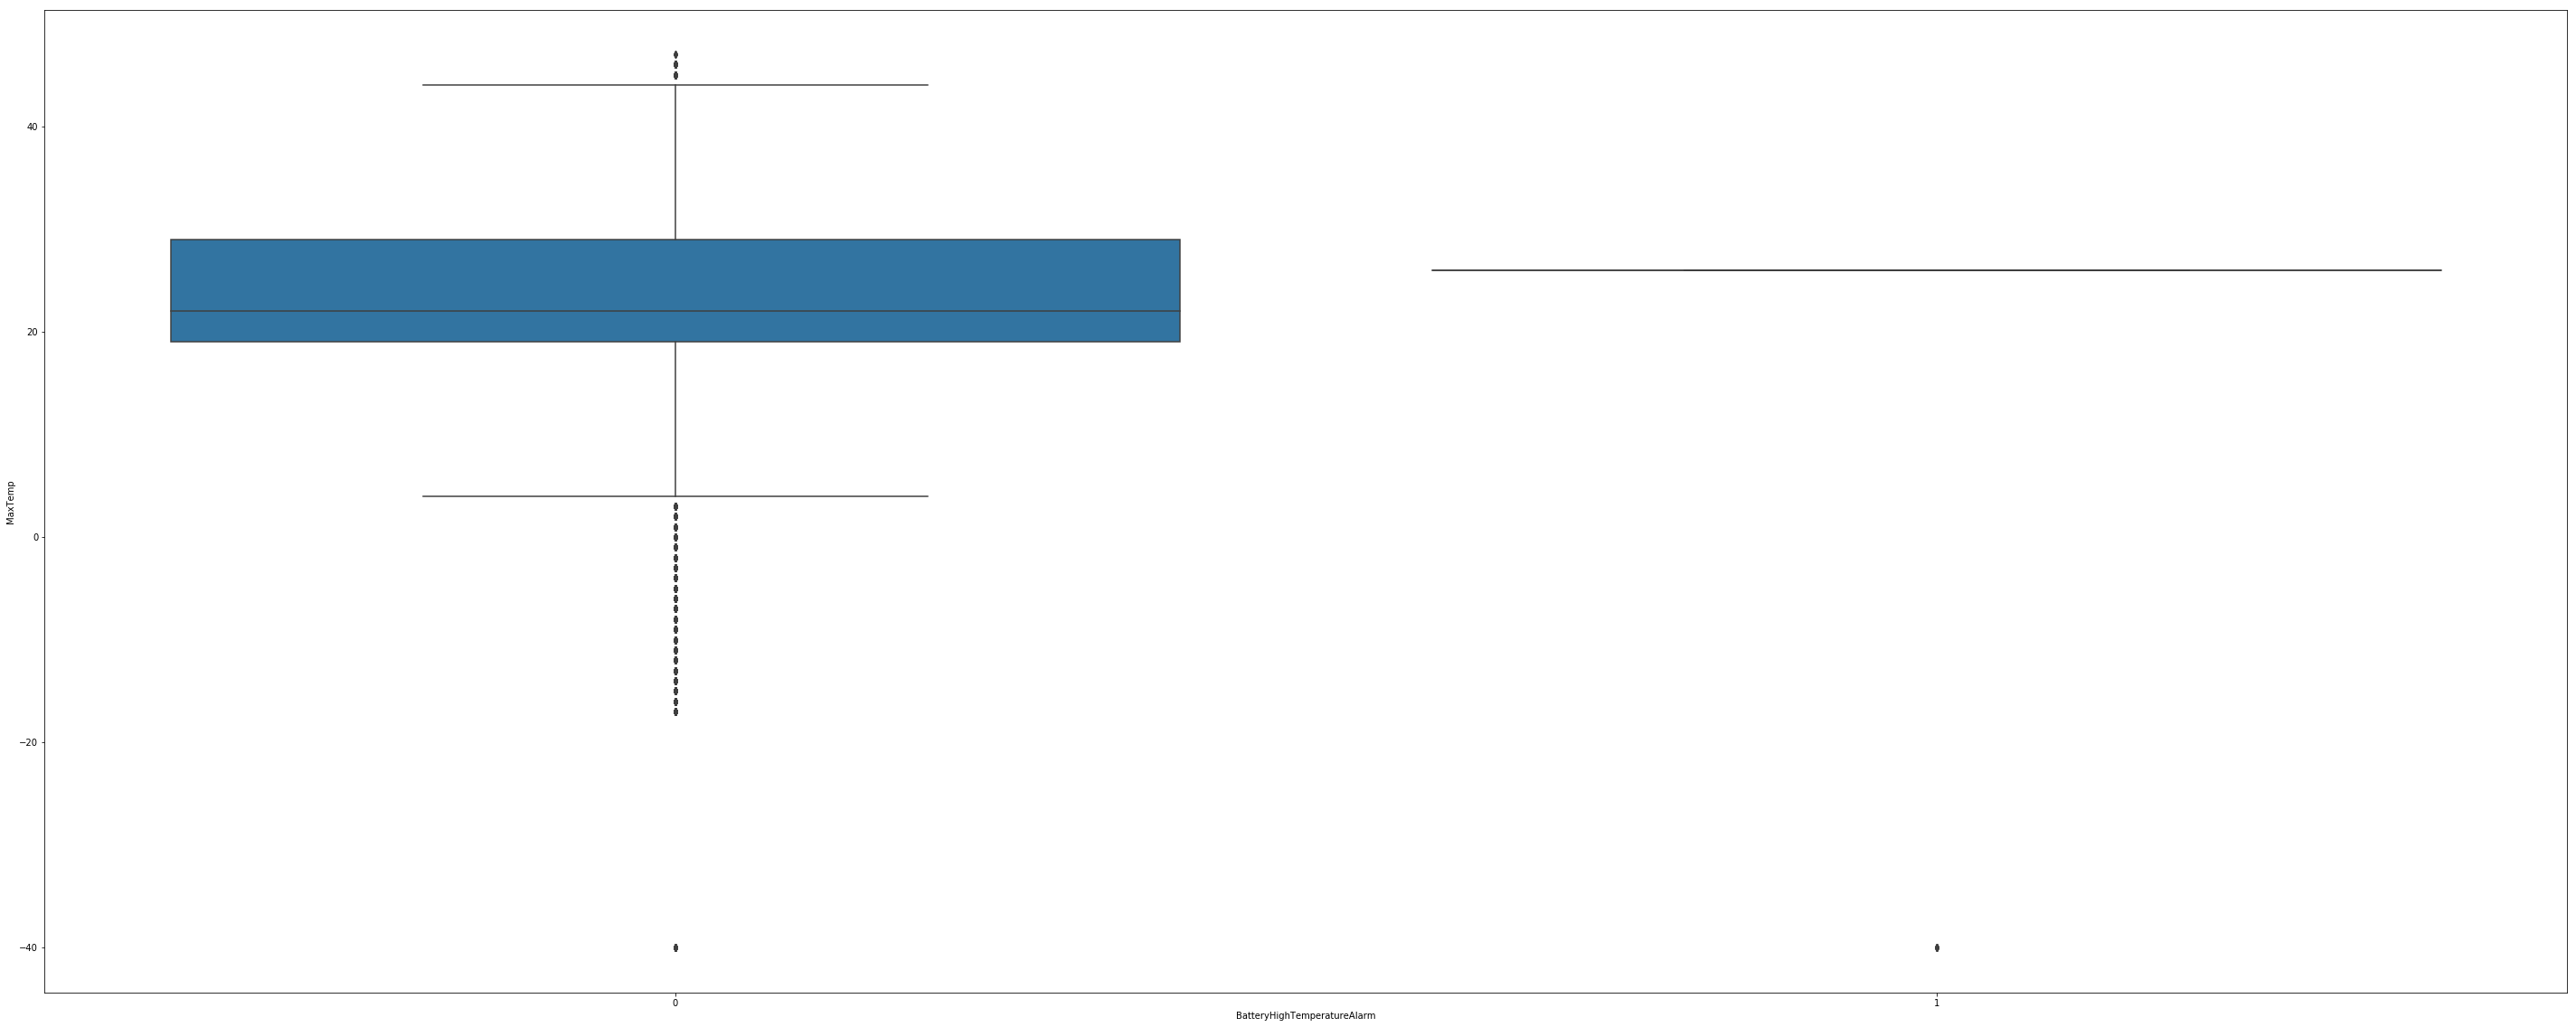

In [104]:
plt.figure(figsize=(50,20))
sns.boxplot(y=df.MaxTemp,x=df.BatteryHighTemperatureAlarm)

In [102]:
num_cols

['B2V_MaxCellVoltage',
 'B2V_MinCellVoltage',
 'CrankshaftSpeed',
 'EVehBatSOC',
 'EVehTotalFlow',
 'EVehTotalVol',
 'InsulationResistance',
 'MaxTemp',
 'MinTemp',
 'TotalVehicleDistance',
 'VehicleSpeed',
 'EMControlTmp',
 'EMRotation',
 'EMTorque',
 'EMTemp',
 'EMVoltage',
 'EMBusCurrentFlow']

(0, 5)

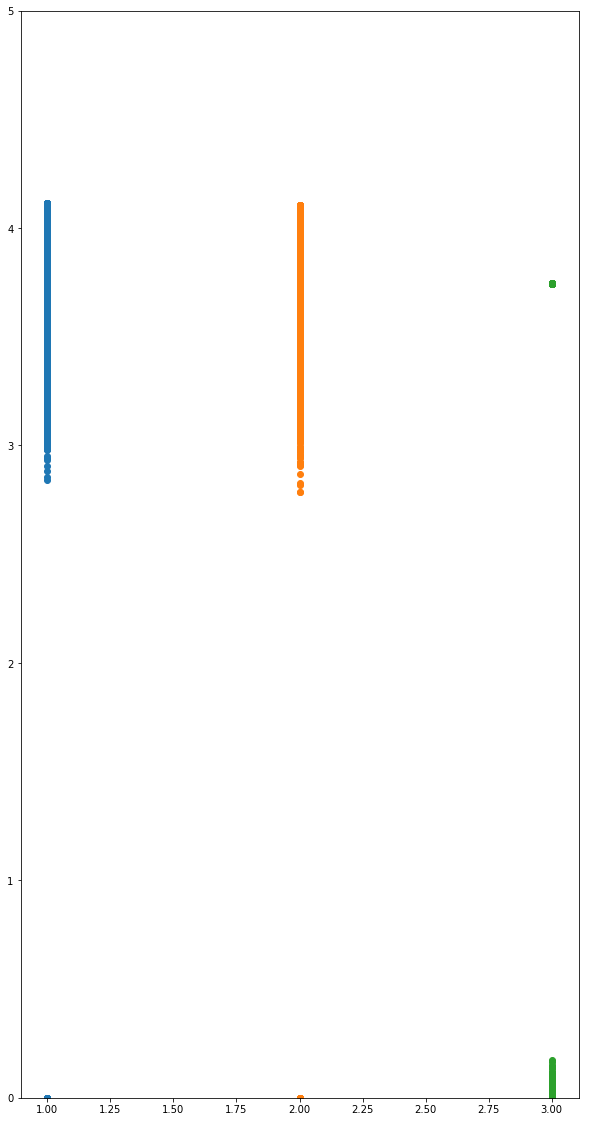

In [20]:
from itertools import repeat
plt.figure(figsize=(10,20))
plt.scatter(x=list(repeat(1,df.shape[0])),y=df.B2V_MaxCellVoltage)
plt.scatter(x=list(repeat(2,df.shape[0])),y=df.B2V_MinCellVoltage)
plt.scatter(x=list(repeat(3,df.shape[0])),y=df.B2V_MaxCellVoltage-df.B2V_MinCellVoltage)
plt.ylim(0,5)

In [24]:
df[df.B2V_MaxCellVoltage>6]

,vin,timestamp,battery,ActTransmissionGearLeverPos,B2V_MaxCellTempCellNumber,B2V_MaxCellVoltage,B2V_MaxCellVoltageCellNumber,B2V_MinCellTempCellNumber,B2V_MinCellVoltage,B2V_MinCellVoltageCellNumber,...,EMsts,EMControlTmp,EMRotation,EMTorque,EMTemp,EMVoltage,EMBusCurrentFlow,event,uploadType,id
291334,LFV0A24G9H3500077,2017-12-11 07:39:30,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,65.279,65....",0,1,65.279,1,1,0.0,92,...,4,-40.0,-10000.0,-511.0,-40.0,0.0,-511.0,upload,upload,LFV0A24G9H3500077_15


In [26]:
pd.set_option('display.max_columns', None)  
df.loc[291330:291337]

,vin,timestamp,battery,ActTransmissionGearLeverPos,B2V_MaxCellTempCellNumber,B2V_MaxCellVoltage,B2V_MaxCellVoltageCellNumber,B2V_MinCellTempCellNumber,B2V_MinCellVoltage,B2V_MinCellVoltageCellNumber,BatteryHighTemperatureAlarm,BatteryMonomerConsistencyDifferenceAlarm,BrakeSystemAlarm,CrankshaftSpeed,DC_DCStatusAlarm,DCTemperatureAlarm,DC_DC_Sts,DeviceTypeOvercharge,DriveMotorControllerTemperatureAlarm,DriveMotorTemperatureAlarm,EVehBatSOC,EVehTotalFlow,EVehTotalVol,GPSLatitude,GPSLongitude,HighVoltageInterlockStateAlarm,HighestLevelAlarm,InsulationAlarm,InsulationResistance,MaxTemp,MaxTempBatProbeCellNumber,MinTemp,MinTempBatProbeCellNumber,OvervoltageAlarm,SOCHighAlarm,SOCJumpAlarm,SOCLowAlarm,SerialNumOfMaxVoltate,SerialNumOfMinVoltate,SingleCellOvervoltageAlarm,SingleCellUndervoltageAlarm,TempContrastAlarm,TotalVehicleDistance,UndervoltageAlarm,VehBrakeSts,VehChargingSts,VehDriveSts,VehRunMode,VehicleSpeed,VehicleStatus,engine_state,storageSystemMismatchAlarm,EMSerNum,EMsts,EMControlTmp,EMRotation,EMTorque,EMTemp,EMVoltage,EMBusCurrentFlow,event,uploadType,id
291330,LFV0A24G9H3500077,2017-12-11 07:37:30,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.737,3.73...",0,1,3.744,61,1,0.0,92,0,0,0,0.0,0,0,2,0,0,0,0.0,1000.0,0.0,43.84359,125.210089,0,0,0,0.0,22.0,1,-40.0,15,0,0,0,0,1,1,0,0,0,0.0,0,0,254,0,255,0.0,2,2,0,1,4,-40.0,-10000.0,-511.0,-40.0,0.0,-511.0,upload,upload,LFV0A24G9H3500077_15
291331,LFV0A24G9H3500077,2017-12-11 07:38:00,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.737,3.73...",0,1,3.744,61,1,0.0,92,0,0,0,0.0,0,0,2,0,0,0,0.0,1000.0,0.0,43.843615,125.210115,0,0,0,0.0,22.0,1,-40.0,15,0,0,0,0,1,1,0,0,0,0.0,0,0,254,0,255,0.0,2,2,0,1,4,-40.0,-10000.0,-511.0,-40.0,0.0,-511.0,upload,upload,LFV0A24G9H3500077_15
291332,LFV0A24G9H3500077,2017-12-11 07:38:30,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.737,3.73...",0,1,3.744,61,1,0.0,92,0,0,0,0.0,0,0,2,0,0,0,0.0,1000.0,0.0,43.843577,125.210146,0,0,0,0.0,22.0,1,-40.0,15,0,0,0,0,1,1,0,0,0,0.0,0,0,254,0,255,0.0,2,2,0,1,4,-40.0,-10000.0,-511.0,-40.0,0.0,-511.0,upload,upload,LFV0A24G9H3500077_15
291333,LFV0A24G9H3500077,2017-12-11 07:39:00,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.737,3.73...",0,1,3.744,61,1,0.0,92,0,0,0,0.0,0,0,2,0,0,0,0.0,1000.0,0.0,43.843386,125.210092,0,0,0,0.0,22.0,1,-40.0,15,0,0,0,0,1,1,0,0,0,0.0,0,0,254,0,255,0.0,2,2,0,1,4,-40.0,-10000.0,-511.0,-40.0,0.0,-511.0,upload,upload,LFV0A24G9H3500077_15
291334,LFV0A24G9H3500077,2017-12-11 07:39:30,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,65.279,65....",0,1,65.279,1,1,0.0,92,0,0,0,0.0,0,0,2,0,0,0,0.0,1000.0,0.0,43.843342,125.209886,0,0,0,0.0,-40.0,0,-40.0,15,0,0,0,0,1,1,0,0,0,0.0,0,0,254,0,255,0.0,2,2,0,1,4,-40.0,-10000.0,-511.0,-40.0,0.0,-511.0,upload,upload,LFV0A24G9H3500077_15
291335,LFV0A24G9H3500077,2017-12-11 07:40:00,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.737,3.73...",0,1,3.744,61,1,0.0,92,0,0,0,0.0,0,0,2,0,0,0,0.0,1000.0,0.0,43.843585,125.210002,0,0,0,0.0,22.0,1,-40.0,15,0,0,0,0,1,1,0,0,0,0.0,0,0,254,0,255,0.0,2,2,0,1,4,-40.0,-10000.0,-511.0,-40.0,0.0,-511.0,upload,upload,LFV0A24G9H3500077_15
291336,LFV0A24G9H3500077,2017-12-11 07:40:52,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.737,3.73...",0,1,3.744,61,1,0.0,92,0,0,0,0.0,0,0,2,0,0,0,0.0,1000.0,0.0,43.843664,125.209775,0,0,0,0.0,22.0,1,-40.0,15,0,0,0,0,1,1,0,0,0,0.0,0,0,254,0,255,0.0,2,2,0,1,4,-40.0,-10000.0,-511.0,-40.0,0.0,-511.0,upload,upload,LFV0A24G9H3500077_15
291337,LFV0A24G9H3500077,2017-12-11 07:41:22,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.737,3.73...",0,1,3.744,61,1,0.0,92,0,0,0,0.0,0,0,2,0,0,0,0.0,1000.0,0.0,43.843682,125.209755,0,0,0,0.0,22.0,1,-40.0,15,0,0,0,0,1,1,0,0,0,0.0,0,0,254,0,255,0.0,2,2,0,1,4,-40.0,-10000.0,-511.0,-40.0,0.0,-511.0,upload,upload,LFV0A24G9H3500077_15


In [15]:
for i in df.columns:
    try:
        l=df[i].apply(lambda x:len(x.split(','))).max()
        if l>=2:
            print ("{} has problem".format(i))
    except:
        try:
            l=df[i].apply(lambda x:type(x)==list)
            if sum(l)>=1:
                print ("{} has problem".format(i))
        except:
            print ("{} cannot be processed".format(i))

battery has problem


In [13]:
for i in sts_cols:
    print("{}:{}".format(i,df[i].unique()))

VehChargingSts:['3' '1' '4' '254']
VehicleStatus:['1' '2' '3']
EMsts:['4' '1' '2' '3' '255']
VehRunMode:['2' '1' '255']
engine_state:['1' '2']
uploadType:['upload']
VehBrakeSts:['1' '0']
DC_DC_Sts:['1' '2' '255']
DeviceTypeOvercharge:['0']
VehDriveSts:['0' '1']
ActTransmissionGearLeverPos:['P' 'D' '0' '倒挡']
event:['upload']


In [65]:
df[df.VehChargingSts=='4'].shape

(1965, 63)

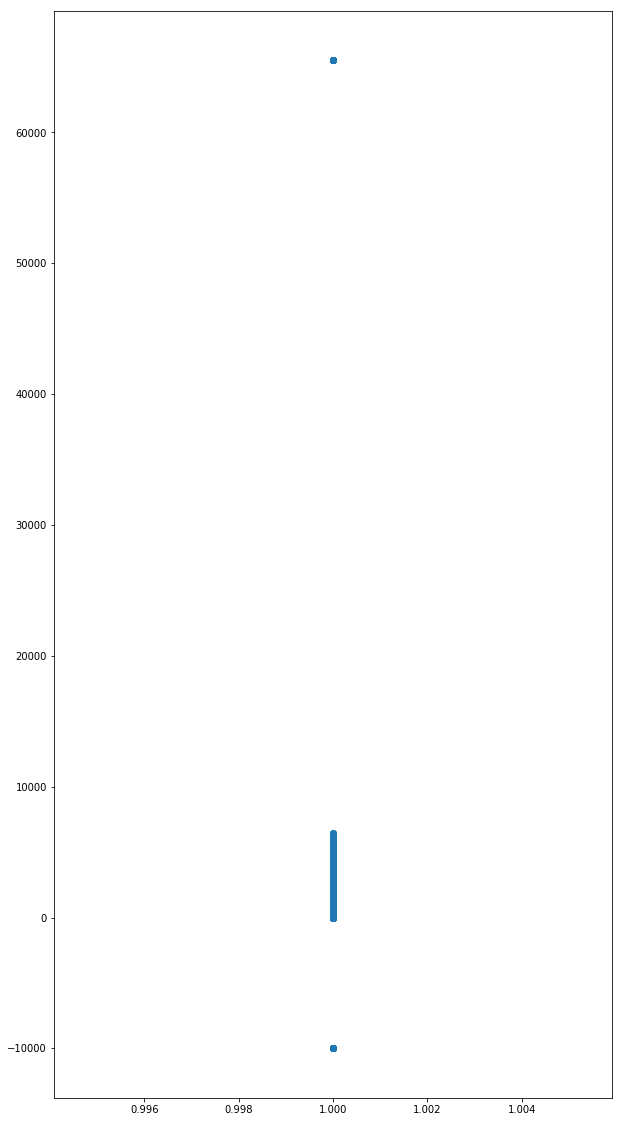

In [86]:
from itertools import repeat
plt.figure(figsize=(10,20))
plt.scatter(x=list(repeat(1,df.shape[0])),y=df.EMRotation)

In [84]:
for i in num_cols:
    if df[i].min()==0:
        t=df[df[i]>0][i]
    else:
        t=df[i]
    print("{}:{}~{}~{}".format(i,np.percentile(t,10),np.percentile(t,50),np.percentile(t,90)))

B2V_MaxCellVoltage:3.524~3.664~4.001
B2V_MinCellVoltage:3.5120000000000005~3.657~3.995
CrankshaftSpeed:760.0~1591.0~2016.0
EVehBatSOC:0.01~0.35~0.89
EVehTotalFlow:-12.0~0.0~59.0
EVehTotalVol:366.0~379.5~416.5
InsulationResistance:6400.0~7845.0~9440.0
MaxTemp:16.0~26.0~33.0
MinTemp:15.0~25.0~32.0
TotalVehicleDistance:47.0~24737.0~94908.0
VehicleSpeed:12.9~79.9~115.30000000000001
EMControlTmp:0.0~29.0~41.0
EMRotation:0.0~0.0~1884.0
EMTorque:-109.0~0.0~6.0
EMTemp:12.0~69.0~104.0
EMVoltage:366.0~379.3~415.8
EMBusCurrentFlow:-41.0~0.0~3.0


In [87]:
sum(df['EMRotation']<0)

109851

In [65]:
def plot_box(df,var,alarm,**kwargs):
    df=df
    sns.boxplot(y=df[var],x=df[alarm],**kwargs)
    

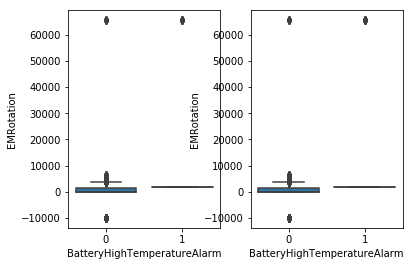

In [67]:
fig,ax=plt.subplots(1,2)
plot_box(df,'EMRotation','BatteryHighTemperatureAlarm',ax=ax[0])
plot_box(df,'EMRotation','BatteryHighTemperatureAlarm')



In [104]:
def plot_pie(df,sts,alarm):
    x=df.groupby(alarm)
    n=list(x.groups.keys())
    #fig, ax = plt.subplots(1, len(n))
    for i in range(0,len(n)):
        plt.subplot(1,len(n),i+1)
        plt.pie(x.get_group(n[i])[sts].value_counts(),labels=x.get_group(n[i])[sts].unique())
        plt.title(n[i])

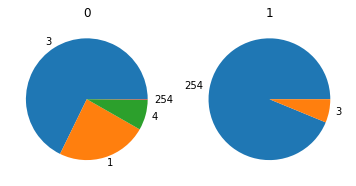

In [105]:
plot_pie(df,'VehChargingSts','BatteryHighTemperatureAlarm')

In [118]:
g1=df.groupby(['BatteryHighTemperatureAlarm','VehChargingSts']).size()
g2=g1.groupby(level=0).apply(lambda x:x/x.sum()).reset_index()

In [119]:
t=g2.set_index(['BatteryHighTemperatureAlarm','VehChargingSts']).unstack()

In [120]:
t.columns=t.columns.droplevel(0)

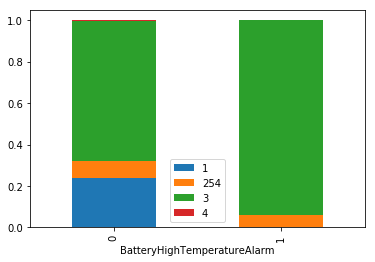

In [129]:
t.plot(kind='bar',stacked=True)
plt.legend(loc='best')

In [6]:
def plot_stack(df,sts,alarm,**kwargs):
    if 'ax' not in kwargs :
        fig = plt.figure()
        ax= fig.add_subplot(111) 
    else:
        ax=kwargs['ax'] 
    g=df.groupby([alarm,sts]).size().groupby(level=0).apply(lambda x:x/x.sum()).reset_index()
    t=g.set_index([alarm,sts]).unstack()
    t.columns=t.columns.droplevel(0)
    t.plot(kind='bar',stacked=True,ax=ax)
    ax.set_xlabel(alarm)
    ax.set_ylabel('{} % to toal'.format(sts))
    ax.legend(loc='best')
    

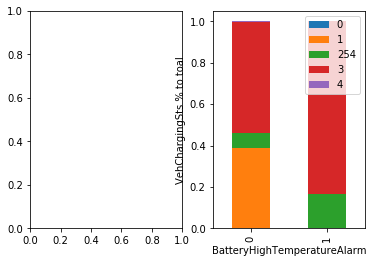

In [8]:
fig,ax=plt.subplots(1,2)
plot_stack(df,'VehChargingSts','BatteryHighTemperatureAlarm',ax=ax[1])

In [24]:
num_cols

['B2V_MaxCellVoltage',
 'B2V_MinCellVoltage',
 'CrankshaftSpeed',
 'EMBusCurrentFlow',
 'EMControlTmp',
 'EMRotation',
 'EMTemp',
 'EMTorque',
 'EMVoltage',
 'EVehBatSOC',
 'EVehTotalFlow',
 'EVehTotalVol',
 'InsulationResistance',
 'MaxTemp',
 'MinTemp',
 'TotalVehicleDistance',
 'VehicleSpeed']

In [25]:
len(num_cols)

17

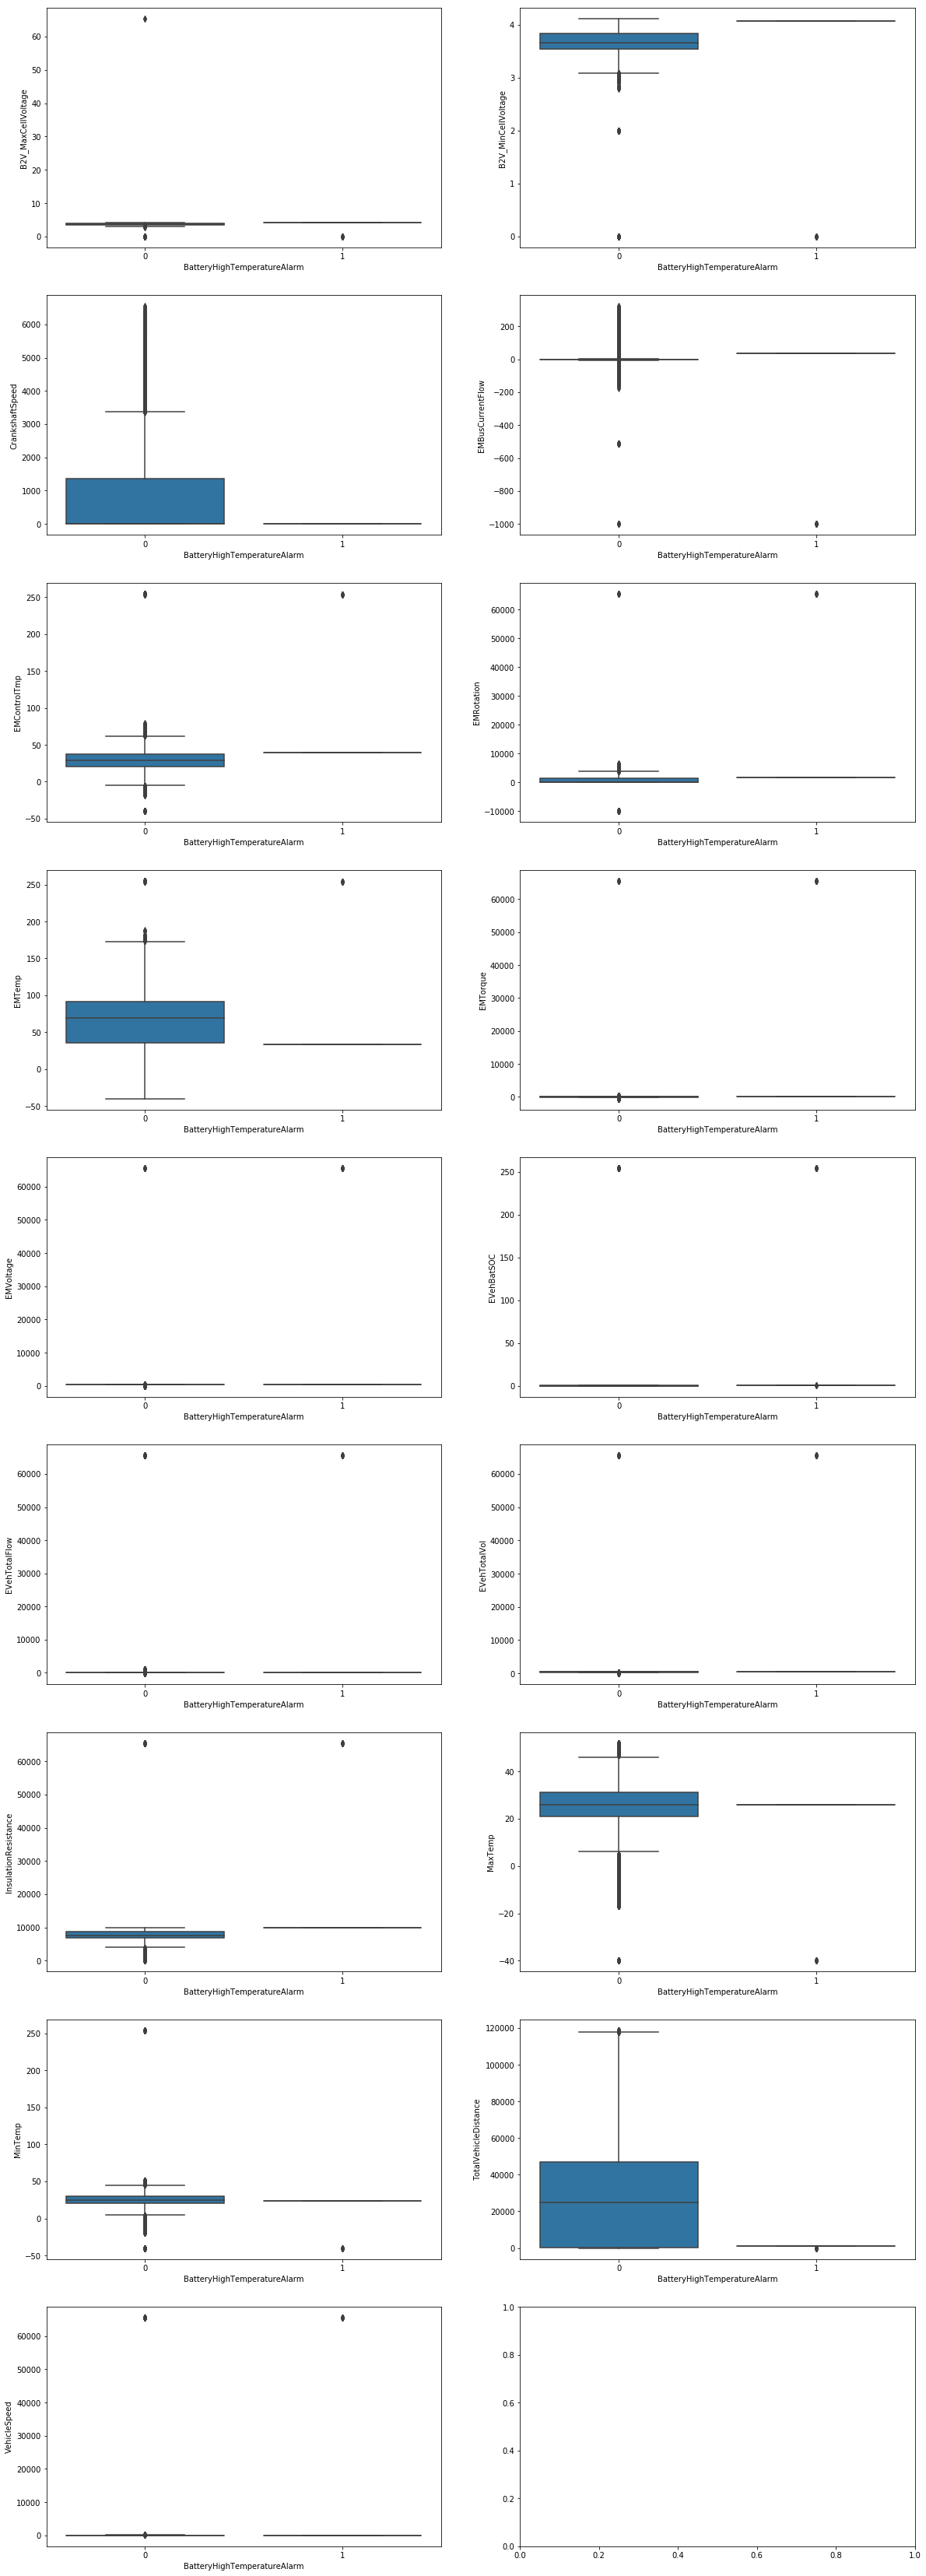

In [72]:
fig,ax=plt.subplots(9,2,figsize=(20,60))
for i,j in list(zip(num_cols,ax.flatten())):
    ax=j
    plot_box(df,i,'BatteryHighTemperatureAlarm',ax=j)

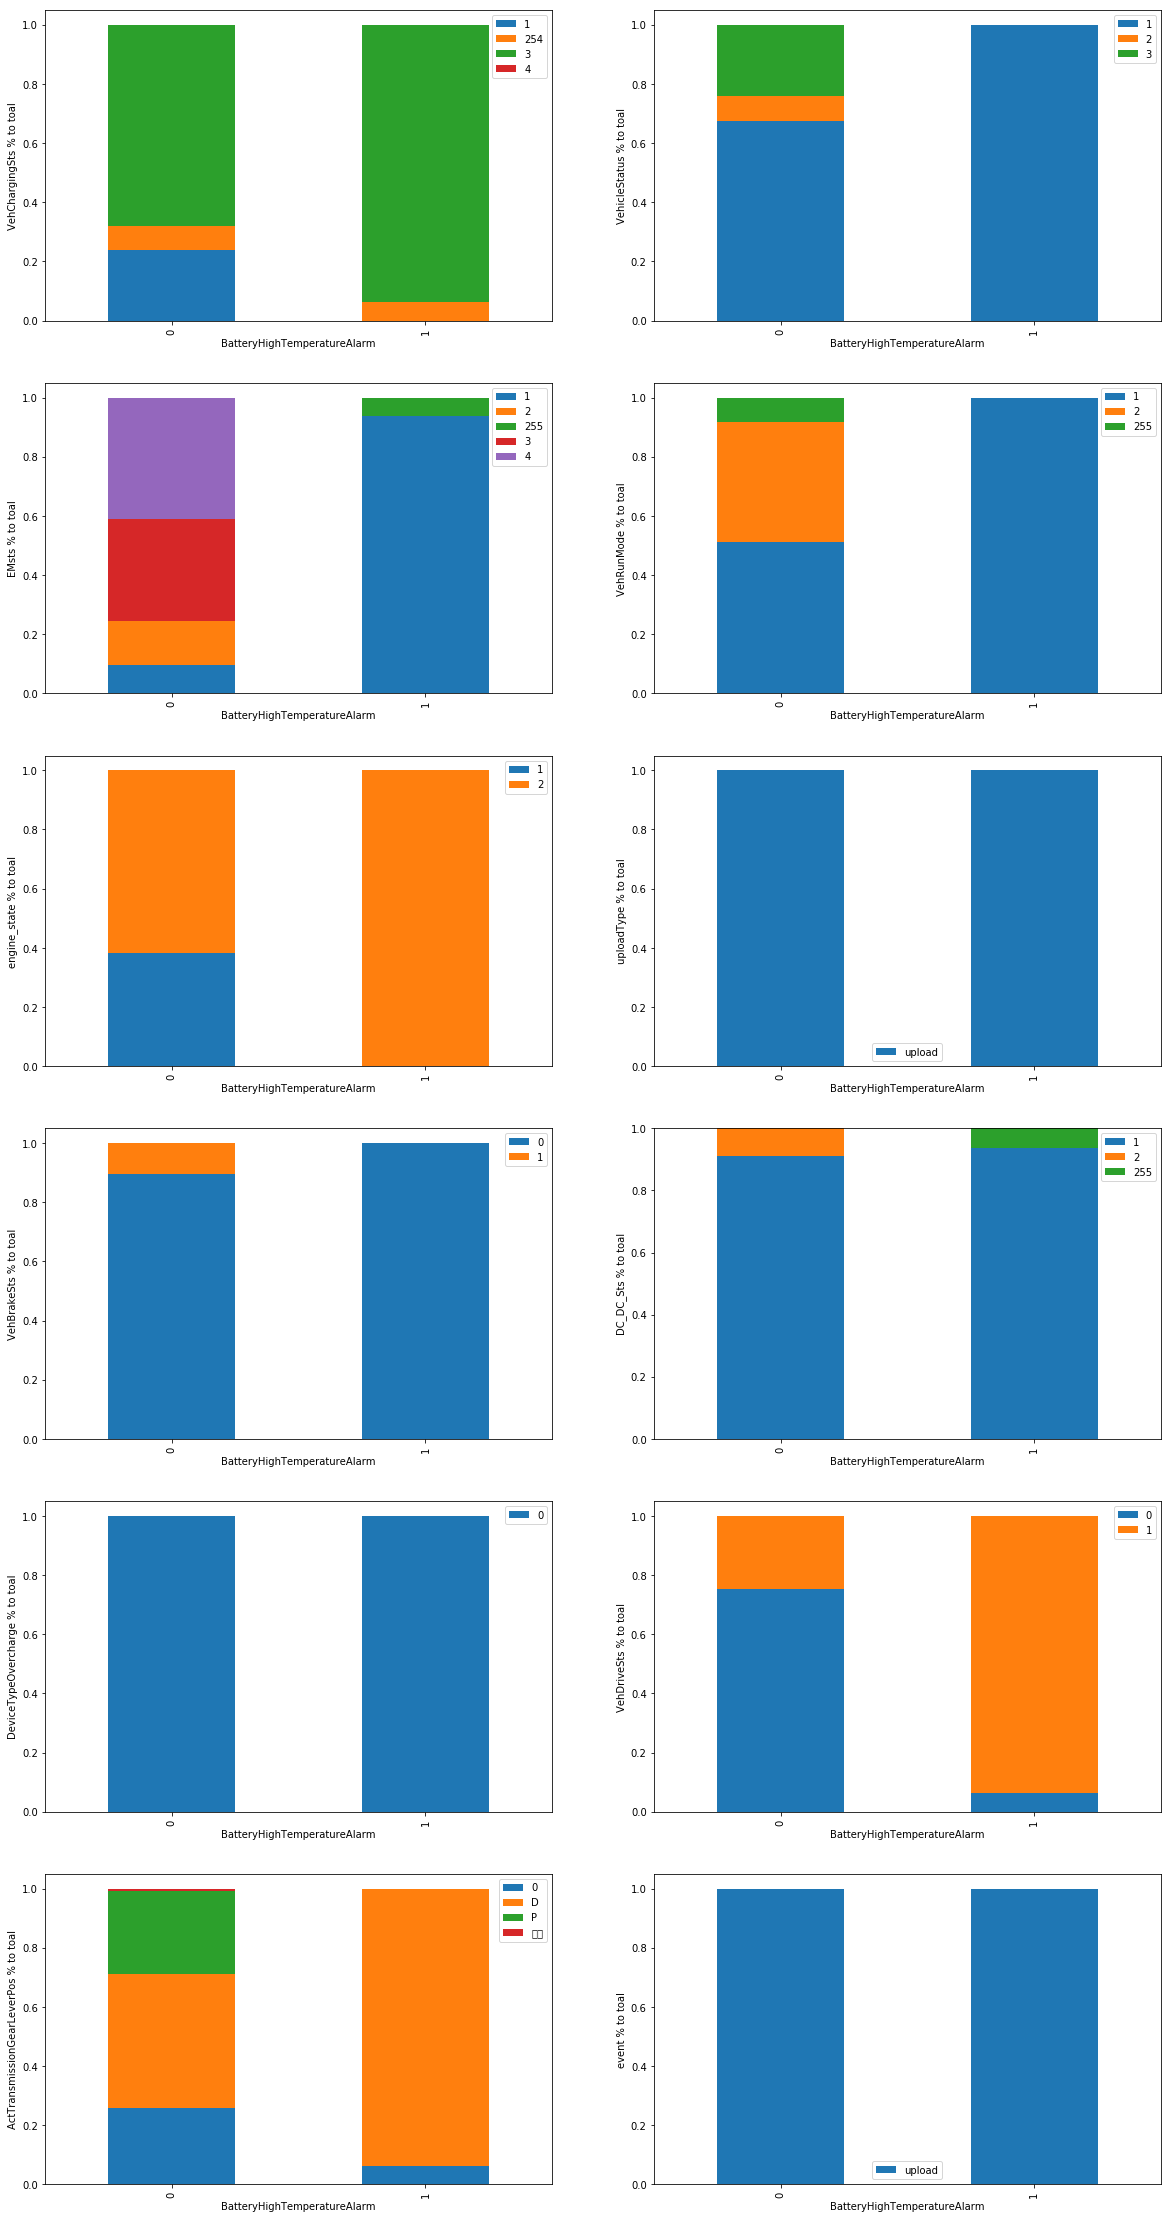

In [104]:
fig,ax=plt.subplots(6,2,figsize=(20,40))
for i,j in list(zip(sts_cols,ax.flatten())):
    ax=j
    plot_stack(df,i,'BatteryHighTemperatureAlarm',ax=j)

In [76]:
len(sts_cols)

12

In [7]:
df.vin.head()

0    LFV0A24G0G3500029
1    LFV0A24G0G3500029
2    LFV0A24G0G3500029
3    LFV0A24G0G3500029
4    LFV0A24G0G3500029
Name: vin, dtype: object

In [4]:
vin1=df[df.vin=='LFV0A24G0G3500029']

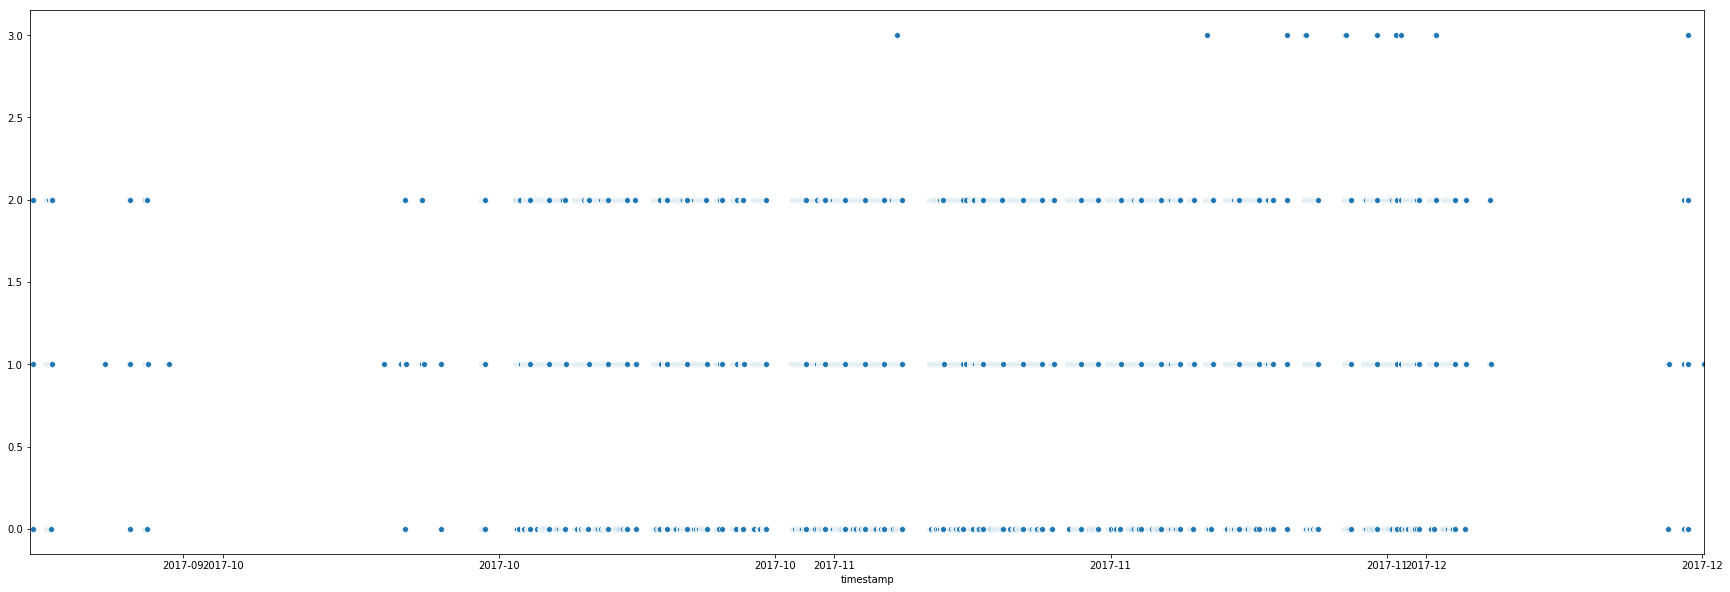

In [41]:
plt.figure(figsize=(30,10))
#sns.scatterplot(x='timestamp',y='MaxTemp',data=vin1,style='BatteryHighTemperatureAlarm')
sns.scatterplot(x=vin1['timestamp'],y=vin1.MaxTemp-vin1.MinTemp,data=vin1)
#sns.scatterplot(x='timestamp',y='MinTemp',data=vin1,color='red')
import matplotlib.dates as mdates
#xvalues=mdates.date2num(vin1['timestamp'])

plt.xlim(vin1['timestamp'].min(),vin1['timestamp'].max())
myFmt = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(myFmt)

In [5]:
test=vin1[['timestamp','MaxTemp']]
test=test.set_index('timestamp')
test=test.sort_index()

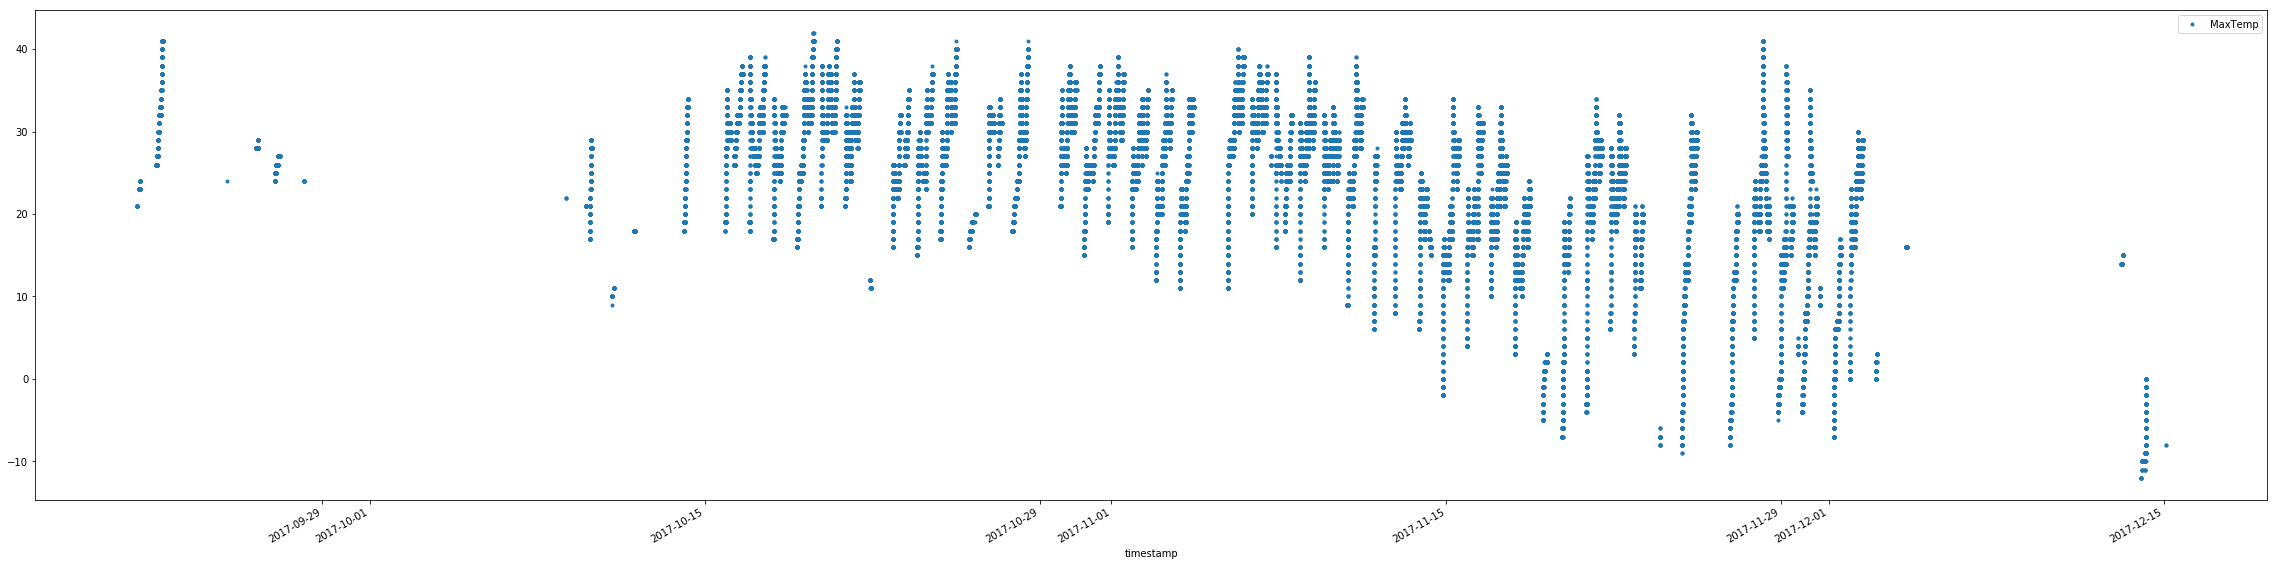

In [10]:
plt.figure(figsize=(40,10))
test.plot(ax=plt.gca(),style='.')

In [21]:
df2=pyreadr.read_r('2018_aug_without_battery.rds')
df2=df2[None]

In [22]:
df2.shape

(9446734, 59)

In [23]:
df2.columns

Index(['vin', 'timestamp', 'ActTransmissionGearLeverPos',
       'B2V_MaxCellTempCellNumber', 'B2V_MaxCellVoltage',
       'B2V_MaxCellVoltageCellNumber', 'B2V_MinCellTempCellNumber',
       'B2V_MinCellVoltage', 'B2V_MinCellVoltageCellNumber',
       'BatteryHighTemperatureAlarm',
       'BatteryMonomerConsistencyDifferenceAlarm', 'BrakeSystemAlarm',
       'CrankshaftSpeed', 'DC_DCStatusAlarm', 'DCTemperatureAlarm',
       'DC_DC_Sts', 'DeviceTypeOvercharge',
       'DriveMotorControllerTemperatureAlarm', 'DriveMotorTemperatureAlarm',
       'EVehBatSOC', 'EVehTotalFlow', 'EVehTotalVol', 'GPSLatitude',
       'GPSLongitude', 'HighVoltageInterlockStateAlarm', 'HighestLevelAlarm',
       'InsulationAlarm', 'InsulationResistance', 'MaxTemp',
       'MaxTempBatProbeCellNumber', 'MinTemp', 'MinTempBatProbeCellNumber',
       'OvervoltageAlarm', 'SOCHighAlarm', 'SOCJumpAlarm', 'SOCLowAlarm',
       'SerialNumOfMaxVoltate', 'SerialNumOfMinVoltate',
       'SingleCellOvervoltageAlarm', 'Sing

In [24]:
df.columns

Index(['ActTransmissionGearLeverPos', 'B2V_MaxCellTempCellNumber',
       'B2V_MaxCellVoltage', 'B2V_MaxCellVoltageCellNumber',
       'B2V_MinCellTempCellNumber', 'B2V_MinCellVoltage',
       'B2V_MinCellVoltageCellNumber', 'BatteryHighTemperatureAlarm',
       'BatteryMonomerConsistencyDifferenceAlarm', 'BrakeSystemAlarm',
       'CrankshaftSpeed', 'DCTemperatureAlarm', 'DC_DCStatusAlarm',
       'DC_DC_Sts', 'DeviceTypeOvercharge',
       'DriveMotorControllerTemperatureAlarm', 'DriveMotorTemperatureAlarm',
       'EMBusCurrentFlow', 'EMControlTmp', 'EMRotation', 'EMSerNum', 'EMTemp',
       'EMTorque', 'EMVoltage', 'EMsts', 'EVehBatSOC', 'EVehTotalFlow',
       'EVehTotalVol', 'GPSLatitude', 'GPSLongitude',
       'HighVoltageInterlockStateAlarm', 'HighestLevelAlarm',
       'InsulationAlarm', 'InsulationResistance', 'MaxTemp',
       'MaxTempBatProbeCellNumber', 'MinTemp', 'MinTempBatProbeCellNumber',
       'OvervoltageAlarm', 'SOCHighAlarm', 'SOCJumpAlarm', 'SOCLowAlarm',
      

In [25]:
set(df.columns)-set(df2.columns)

{'battery', 'event', 'id', 'uploadType'}

In [27]:
alarm_cols=['TempContrastAlarm',
 'DCTemperatureAlarm',
 'SOCLowAlarm',
 'SingleCellUndervoltageAlarm',
 'HighestLevelAlarm',
 'SOCJumpAlarm',
 'UndervoltageAlarm',
 'InsulationAlarm',
 'SingleCellOvervoltageAlarm',
 'DriveMotorControllerTemperatureAlarm',
 'HighVoltageInterlockStateAlarm',
 'DC_DCStatusAlarm',
 'BrakeSystemAlarm',
 'SOCHighAlarm',
 'BatteryMonomerConsistencyDifferenceAlarm',
 'storageSystemMismatchAlarm',
 'DriveMotorTemperatureAlarm',
 'OvervoltageAlarm',
 'BatteryHighTemperatureAlarm']

In [31]:
for i in alarm_cols:
    print("{}:{}".format(i,df2[i].unique()))

TempContrastAlarm:['0' '1']
DCTemperatureAlarm:['0']
SOCLowAlarm:['0' '1']
SingleCellUndervoltageAlarm:['0']
HighestLevelAlarm:['0' '3' '2' '1']
SOCJumpAlarm:['0' '1']
UndervoltageAlarm:['0' '1']
InsulationAlarm:['0']
SingleCellOvervoltageAlarm:['0']
DriveMotorControllerTemperatureAlarm:['0']
HighVoltageInterlockStateAlarm:['0' '1']
DC_DCStatusAlarm:['0' '1']
BrakeSystemAlarm:['0' '1']
SOCHighAlarm:['0']
BatteryMonomerConsistencyDifferenceAlarm:['0']
storageSystemMismatchAlarm:['0']
DriveMotorTemperatureAlarm:['0']
OvervoltageAlarm:['0' '1']
BatteryHighTemperatureAlarm:['0' '1']


In [30]:
df2.HighestLevelAlarm.unique()

0    9442390
3       3927
2        380
1         37
Name: HighestLevelAlarm, dtype: int64

In [32]:
df.shape

(1310197, 63)

In [33]:
df2.shape

(9446734, 59)

In [35]:
len(df.vin.unique())

274

In [40]:
df2.vin.unique()[:5]

array(['LFV0A24G0G3500127', 'LFV0A24G0G3500130', 'LFV0A24G0G3500161',
       'LFV0A24G0G3500175', 'LFV0A24G0G3500192'], dtype=object)

In [39]:
df.vin[1][6:8]

'4G'

In [41]:
os.getcwd()

'D:\\Python 3\\jupyter\\RTM\\C7PHEV'

In [43]:
with open("D:\\Python 3\\jupyter\\RTM\\CBEV\\rtmt.txt") as f:
    x=[line.split(',') for line in f]

In [46]:
len(x)

123675

In [47]:
x[0]

['"rtm_id;""vin"";""timestamp"";""command_id"";""seq_build"";""seq_id"";""seq_total_time_s"";""seq_total_mileage_km"";""seq_total_soc"";""seq_total_capacity_Ah"";""seq_bat_capacity_Ah"";""seq_grid_capacity_Ah"";""seq_total_energy_Wh"";""int_time_diff_s"";""int_capacity_Ah"";""int_energy_Wh"";""int_mileage"";""int_soc"";""aquisition_time"";""vehicle_state"";""charging_state"";""operation_mode"";""speed"";""mileage"";""total_voltage"";""total_current"";""soc"";""dcdc_state"";""driving_force"";""braking_force"";""gear_position"";""insulation_resistance"";""throttle"";""break_pedal"";""em_quantity"";""em_no_01"";""em_state_01"";""em_controller_temp_01"";""em_speed_01"";""em_torque_01"";""em_temp_01"";""em_voltage_01"";""em_current_01"";""em_no_02"";""em_state_02"";""em_controller_temp_02"";""em_speed_02"";""em_torque_02"";""em_temp_02"";""em_voltage_02"";""em_current_02"";""engine_state"";""engine_speed"";""engine_fuel_consumption"";""gps_state"";""gps_longitude"";""gps_latitude"";""max_vo

In [48]:
x[1]

['"1;""WAURRCGE1KB000268"";""2019-05-27 10:42:16"";""02"";""1"";""2019-05-27 10:42:20"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""2019-05-27 10:42:20"";""01"";""03"";""01"";""0.0"";""4095.0"";""409.5"";""1.0"";""60"";""01"";""0"";""0"";""P"";""3730"";""0"";""0"";""2"";""1"";""03"";""28"";""0"";""0.0"";""27"";""409.5"";""0.0"";""2"";""03"";""28"";""0"";""0.0"";""27"";""409.5"";""0.0"";;""0"";""0.0"";""01"";""116.494"";""39.9833"";""1"";""13"";""3.798"";""1"";""61"";""3.790"";""1"";""1"";""24"";""1"";""1"";""24"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";""0"";;""0"";;""0"";;""0"";;""1"";""1"";""410"";""1"";""108"";""1"";""108"";""{1: 3.797"\t 2: 3.797\t 3: 3.797\t 4: 3.793\t 5: 3.793\t 6: 3.793\t 7: 3.792\t 8: 3.793\t 9: 3.793\t 10: 3.792\t 11: 3.794\t 12: 3.792\t 13: 3.798\t 14: 3.798\t 15: 3.797\t 16: 3.793\t 17: 3.792\t 18: 3.792\t 19: 3.797\t 20: 3.796\t 21: 3.798\t 22: 3.79

In [56]:
len(str(x[0]).replace('\\t','').split(';'))

109

In [59]:
len(str(x[1]).replace('\t','').split(';'))

109

In [62]:
x1=str(x[0]).replace('\\t','').split(';')
x2=str(x[1]).replace('\t','').split(';')

In [63]:
for i in range(109):
    print((x1[i],x2[i]))

('[\'"rtm_id', '[\'"1')
('""vin""', '""WAURRCGE1KB000268""')
('""timestamp""', '""2019-05-27 10:42:16""')
('""command_id""', '""02""')
('""seq_build""', '""1""')
('""seq_id""', '""2019-05-27 10:42:20""')
('""seq_total_time_s""', '""0""')
('""seq_total_mileage_km""', '""0""')
('""seq_total_soc""', '""0""')
('""seq_total_capacity_Ah""', '""0""')
('""seq_bat_capacity_Ah""', '""0""')
('""seq_grid_capacity_Ah""', '""0""')
('""seq_total_energy_Wh""', '""0""')
('""int_time_diff_s""', '""0""')
('""int_capacity_Ah""', '""0""')
('""int_energy_Wh""', '""0""')
('""int_mileage""', '""0""')
('""int_soc""', '""0""')
('""aquisition_time""', '""2019-05-27 10:42:20""')
('""vehicle_state""', '""01""')
('""charging_state""', '""03""')
('""operation_mode""', '""01""')
('""speed""', '""0.0""')
('""mileage""', '""4095.0""')
('""total_voltage""', '""409.5""')
('""total_current""', '""1.0""')
('""soc""', '""60""')
('""dcdc_state""', '""01""')
('""driving_force""', '""0""')
('""braking_force""', '""0""')
('""ge

In [65]:
df.battery.apply(lambda x:len(x.split(","))).max()

128

In [69]:
df.B2V_MaxCellVoltage.max()

65.279

In [76]:
t1=df[df.VehicleSpeed>5000].index
t2=df[df.B2V_MaxCellVoltage>10].index

In [77]:
t2

Int64Index([291334, 1152514], dtype='int64')

In [78]:
len(t1)

7138

In [79]:
len(set(t1)-set(t2))

7138

In [80]:
x=df[df.VehicleSpeed>5000]

In [81]:
pd.set_option('display.max_columns', None)  
x.head()

,ActTransmissionGearLeverPos,B2V_MaxCellTempCellNumber,B2V_MaxCellVoltage,B2V_MaxCellVoltageCellNumber,B2V_MinCellTempCellNumber,B2V_MinCellVoltage,B2V_MinCellVoltageCellNumber,BatteryHighTemperatureAlarm,BatteryMonomerConsistencyDifferenceAlarm,BrakeSystemAlarm,CrankshaftSpeed,DCTemperatureAlarm,DC_DCStatusAlarm,DC_DC_Sts,DeviceTypeOvercharge,DriveMotorControllerTemperatureAlarm,DriveMotorTemperatureAlarm,EMBusCurrentFlow,EMControlTmp,EMRotation,EMSerNum,EMTemp,EMTorque,EMVoltage,EMsts,EVehBatSOC,EVehTotalFlow,EVehTotalVol,GPSLatitude,GPSLongitude,HighVoltageInterlockStateAlarm,HighestLevelAlarm,InsulationAlarm,InsulationResistance,MaxTemp,MaxTempBatProbeCellNumber,MinTemp,MinTempBatProbeCellNumber,OvervoltageAlarm,SOCHighAlarm,SOCJumpAlarm,SOCLowAlarm,SerialNumOfMaxVoltate,SerialNumOfMinVoltate,SingleCellOvervoltageAlarm,SingleCellUndervoltageAlarm,TempContrastAlarm,TotalVehicleDistance,UndervoltageAlarm,VehBrakeSts,VehChargingSts,VehDriveSts,VehRunMode,VehicleSpeed,VehicleStatus,battery,engine_state,event,id,storageSystemMismatchAlarm,timestamp,uploadType,vin
11497,0,1,3.676,77,1,3.668,9,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,36.409226,120.487233,0,0,0,0.0,17.0,1,16.0,8,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.671,3.67...",2,upload,LFV0A24G0H3500047_1,0,2017-12-01 00:50:03,upload,LFV0A24G0H3500047
11498,0,1,3.675,66,1,3.668,9,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,36.409226,120.487233,0,0,0,0.0,17.0,1,17.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.671,3.67...",2,upload,LFV0A24G0H3500047_1,0,2017-12-01 00:50:33,upload,LFV0A24G0H3500047
11499,0,1,3.675,66,1,3.668,9,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,36.409226,120.487233,0,0,0,0.0,17.0,1,16.0,2,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.671,3.67...",2,upload,LFV0A24G0H3500047_1,0,2017-12-01 00:51:03,upload,LFV0A24G0H3500047
11500,0,1,3.675,66,1,3.668,9,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,36.409226,120.487233,0,0,0,0.0,17.0,1,16.0,8,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.671,3.67...",2,upload,LFV0A24G0H3500047_1,0,2017-12-01 00:51:33,upload,LFV0A24G0H3500047
11501,0,1,3.675,68,1,3.668,9,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,36.409226,120.487233,0,0,0,0.0,17.0,1,17.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,"[1.0,1.0,0.0,1000.0,104.0,1.0,104.0,3.671,3.67...",2,upload,LFV0A24G0H3500047_1,0,2017-12-01 00:52:03,upload,LFV0A24G0H3500047


In [85]:
x.groupby('vin').size()

vin
LFV0A24G0H3500047    105
LFV0A24G0H3500050     42
LFV0A24G0H3500064    126
LFV0A24G0H3500078     26
LFV0A24G0H3500081     97
LFV0A24G0H3500095     92
LFV0A24G0H3500100     76
LFV0A24G1H3500039     19
LFV0A24G1H3500056    112
LFV0A24G1H3500073     87
LFV0A24G1H3500087     66
LFV0A24G1H3500090    440
LFV0A24G1H3500123     30
LFV0A24G2H3500048    138
LFV0A24G2H3500051    106
LFV0A24G2H3500065    132
LFV0A24G2H3500079    102
LFV0A24G2H3500082    110
LFV0A24G2H3500101     91
LFV0A24G3H3500043    102
LFV0A24G3H3500057     74
LFV0A24G3H3500060    141
LFV0A24G3H3500074    152
LFV0A24G3H3500088     84
LFV0A24G3H3500091    221
LFV0A24G3H3500107     93
LFV0A24G3H3500124    260
LFV0A24G4H3500049     40
LFV0A24G4H3500052    106
LFV0A24G4H3500066    100
                    ... 
LFV0A24G5H3500089    106
LFV0A24G5H3500125     94
LFV0A24G6H3500053    103
LFV0A24G6H3500084    104
LFV0A24G6H3500098    124
LFV0A24G6H3500103    118
LFV0A24G6H3500120     32
LFV0A24G7H3500028    130
LFV0A24G7H3500045    

In [97]:
x['date']=x['timestamp'].apply(lambda x:x.date())

d:\python 3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
check=pd.DataFrame(x.groupby('vin')['timestamp'].agg([np.min,np.max,len]))

In [108]:
check['duration']=check.amax-check.amin

In [110]:
check['duration']=check['duration'].apply(lambda x:x.total_seconds()/30)

In [111]:
check

,amin,amax,len,duration
vin,,,,
LFV0A24G0H3500047,2017-12-01 00:50:03,2017-12-01 03:10:32,105,280.966667
LFV0A24G0H3500050,2017-12-01 11:54:28,2017-12-01 13:31:02,42,193.133333
LFV0A24G0H3500064,2017-12-06 08:07:31,2017-12-06 12:41:33,126,548.066667
LFV0A24G0H3500078,2017-12-11 07:16:02,2017-12-11 10:59:49,26,447.566667
LFV0A24G0H3500081,2017-12-11 11:23:31,2017-12-11 13:35:27,97,263.866667
LFV0A24G0H3500095,2017-12-13 12:09:23,2017-12-13 15:08:07,92,357.466667
LFV0A24G0H3500100,2017-12-14 16:52:23,2017-12-14 18:29:17,76,193.800000
LFV0A24G1H3500039,2017-11-28 12:46:03,2017-11-28 13:47:36,19,123.100000
LFV0A24G1H3500056,2017-12-04 13:37:20,2017-12-04 16:37:11,112,359.700000


In [113]:
x[x.vin=='LFV0A24G9H3500029']

,ActTransmissionGearLeverPos,B2V_MaxCellTempCellNumber,B2V_MaxCellVoltage,B2V_MaxCellVoltageCellNumber,B2V_MinCellTempCellNumber,B2V_MinCellVoltage,B2V_MinCellVoltageCellNumber,BatteryHighTemperatureAlarm,BatteryMonomerConsistencyDifferenceAlarm,BrakeSystemAlarm,CrankshaftSpeed,DCTemperatureAlarm,DC_DCStatusAlarm,DC_DC_Sts,DeviceTypeOvercharge,DriveMotorControllerTemperatureAlarm,DriveMotorTemperatureAlarm,EMBusCurrentFlow,EMControlTmp,EMRotation,EMSerNum,EMTemp,EMTorque,EMVoltage,EMsts,EVehBatSOC,EVehTotalFlow,EVehTotalVol,GPSLatitude,GPSLongitude,HighVoltageInterlockStateAlarm,HighestLevelAlarm,InsulationAlarm,InsulationResistance,MaxTemp,MaxTempBatProbeCellNumber,MinTemp,MinTempBatProbeCellNumber,OvervoltageAlarm,SOCHighAlarm,SOCJumpAlarm,SOCLowAlarm,SerialNumOfMaxVoltate,SerialNumOfMinVoltate,SingleCellOvervoltageAlarm,SingleCellUndervoltageAlarm,TempContrastAlarm,TotalVehicleDistance,UndervoltageAlarm,VehBrakeSts,VehChargingSts,VehDriveSts,VehRunMode,VehicleSpeed,VehicleStatus,battery,engine_state,event,id,storageSystemMismatchAlarm,timestamp,uploadType,vin,date
814327,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,36.409209,120.487218,0,0,0,0.0,18.0,1,17.0,4,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_1,0,2017-11-24 13:31:19,upload,LFV0A24G9H3500029,2017-11-24
814328,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,36.409209,120.487218,0,0,0,0.0,18.0,1,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_1,0,2017-11-24 13:31:49,upload,LFV0A24G9H3500029,2017-11-24
814329,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843476,125.206941,0,0,0,0.0,18.0,1,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:41:52,upload,LFV0A24G9H3500029,2017-11-24
814330,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843268,125.206803,0,0,0,0.0,19.0,2,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:42:22,upload,LFV0A24G9H3500029,2017-11-24
814331,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843211,125.206712,0,0,0,0.0,18.0,1,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:42:52,upload,LFV0A24G9H3500029,2017-11-24
814332,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843256,125.206604,0,0,0,0.0,18.0,1,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:43:22,upload,LFV0A24G9H3500029,2017-11-24
814333,0,1,3.723,50,1,3.706,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843367,125.20643,0,0,0,0.0,18.0,1,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:43:52,upload,LFV0A24G9H3500029,2017-11-24


In [115]:
import datetime
df[(df.vin=='LFV0A24G9H3500029')&(df['timestamp']>=datetime.date(2017,11,24))&(df['timestamp']<datetime.date(2017,11,25))]

d:\python 3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


,ActTransmissionGearLeverPos,B2V_MaxCellTempCellNumber,B2V_MaxCellVoltage,B2V_MaxCellVoltageCellNumber,B2V_MinCellTempCellNumber,B2V_MinCellVoltage,B2V_MinCellVoltageCellNumber,BatteryHighTemperatureAlarm,BatteryMonomerConsistencyDifferenceAlarm,BrakeSystemAlarm,CrankshaftSpeed,DCTemperatureAlarm,DC_DCStatusAlarm,DC_DC_Sts,DeviceTypeOvercharge,DriveMotorControllerTemperatureAlarm,DriveMotorTemperatureAlarm,EMBusCurrentFlow,EMControlTmp,EMRotation,EMSerNum,EMTemp,EMTorque,EMVoltage,EMsts,EVehBatSOC,EVehTotalFlow,EVehTotalVol,GPSLatitude,GPSLongitude,HighVoltageInterlockStateAlarm,HighestLevelAlarm,InsulationAlarm,InsulationResistance,MaxTemp,MaxTempBatProbeCellNumber,MinTemp,MinTempBatProbeCellNumber,OvervoltageAlarm,SOCHighAlarm,SOCJumpAlarm,SOCLowAlarm,SerialNumOfMaxVoltate,SerialNumOfMinVoltate,SingleCellOvervoltageAlarm,SingleCellUndervoltageAlarm,TempContrastAlarm,TotalVehicleDistance,UndervoltageAlarm,VehBrakeSts,VehChargingSts,VehDriveSts,VehRunMode,VehicleSpeed,VehicleStatus,battery,engine_state,event,id,storageSystemMismatchAlarm,timestamp,uploadType,vin
814327,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,36.409209,120.487218,0,0,0,0.0,18.0,1,17.0,4,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_1,0,2017-11-24 13:31:19,upload,LFV0A24G9H3500029
814328,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,36.409209,120.487218,0,0,0,0.0,18.0,1,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_1,0,2017-11-24 13:31:49,upload,LFV0A24G9H3500029
814329,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843476,125.206941,0,0,0,0.0,18.0,1,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:41:52,upload,LFV0A24G9H3500029
814330,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843268,125.206803,0,0,0,0.0,19.0,2,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:42:22,upload,LFV0A24G9H3500029
814331,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843211,125.206712,0,0,0,0.0,18.0,1,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:42:52,upload,LFV0A24G9H3500029
814332,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843256,125.206604,0,0,0,0.0,18.0,1,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:43:22,upload,LFV0A24G9H3500029
814333,0,1,3.723,50,1,3.706,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843367,125.20643,0,0,0,0.0,18.0,1,18.0,1,0,0,0,0,1,1,0,0,0,-0.2,0,0,254,0,255,65534.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:43:52,upload,LFV0A24G9H3500029
814334,0,1,3.722,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843366,125.206964,0,0,0,0.0,18.0,1,17.0,8,0,0,0,0,1,1,0,0,0,0.0,0,0,254,0,255,0.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:46:49,upload,LFV0A24G9H3500029
814335,0,1,3.723,50,1,3.707,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843093,125.206909,0,0,0,0.0,19.0,4,18.0,1,0,0,0,0,1,1,0,0,0,0.0,0,0,254,0,255,0.0,2,0.0,2,upload,LFV0A24G9H3500029_2,0,2017-11-24 13:47:19,upload,LFV0A24G9H3500029
814336,0,1,3.723,50,1,3.706,51,0,0,0,0.0,0,0,2,0,0,0,-511.0,-40.0,-10000.0,1,-40.0,-511.0,0.0,4,0.0,1000.0,0.0,43.843134,125.208853,0,0,0,0.0,19.0,1,18.0,2,0,0,0,0,1,1,0,0,0,0.0,0,0,254,0,255,0.0,2,0.0,2,upload,LFV0A24G9H3500029_3,0,2017-11-24 15:13:16,upload,LFV0A24G9H3500029


In [10]:
np.repeat([1,2],10)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
pd.Series([1,2])

0    1
1    2
dtype: int64

In [15]:
def cnt(df):
    return(pd.Series(df.groupby('id').size()))
    
    

In [18]:
df.groupby('vin').apply(cnt)

vin                id                   
LFV0A24G0G3500029  LFV0A24G0G3500029_1       784
                   LFV0A24G0G3500029_10     2540
                   LFV0A24G0G3500029_100     874
                   LFV0A24G0G3500029_101    2494
                   LFV0A24G0G3500029_102    2161
                   LFV0A24G0G3500029_103    1257
                   LFV0A24G0G3500029_104    1410
                   LFV0A24G0G3500029_105    2051
                   LFV0A24G0G3500029_106     126
                   LFV0A24G0G3500029_107     410
                   LFV0A24G0G3500029_108     439
                   LFV0A24G0G3500029_109     403
                   LFV0A24G0G3500029_11      499
                   LFV0A24G0G3500029_110    1216
                   LFV0A24G0G3500029_111      42
                   LFV0A24G0G3500029_112      51
                   LFV0A24G0G3500029_113    1997
                   LFV0A24G0G3500029_114    1078
                   LFV0A24G0G3500029_115      99
                   LFV0A24G0

In [21]:
x=[1,2,4,5]
x.index(4)

2

In [1]:
import os
os.getcwd()

'C:\\Users\\faucn27'